In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Load datasets
df = pd.read_csv("./data/train.csv")

# Target variable
y = df["SalePrice"]
X = df.drop("SalePrice", axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(X_train.shape, X_test.shape)


(1022, 80) (438, 80)


In [4]:
import warnings
warnings.filterwarnings("ignore")  # ignore all warnings

In [5]:
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Identify numerical and categorical columns
numeric_cols = X_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_cols = X_train.select_dtypes(include=["object"]).columns.tolist()

print("Numeric features:", len(numeric_cols))
print("Categorical features:", len(categorical_cols))


Numeric features: 37
Categorical features: 43


# Categorical Features

### Identify Categorical Features

In [7]:
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns
X_train_cat = X_train[categorical_features]
X_test_cat = X_test[categorical_features]

In [8]:
X_train_cat

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
135        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1452       RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
762        FV   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
932        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
435        RL   Pave   NaN      IR2         Lvl    AllPub   CulDSac       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1095       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
1130       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1294       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
860        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
1126       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
135        NWAmes       Norm  ...     Attchd          Unf         TA   
1452      Edwards       Norm  ...    Basment          Fin         TA   
762       Somerst       Norm  ...     Attchd          Unf         TA   
932       Somerst       RRNn  ...     Attchd          Fin         TA   
435       CollgCr       PosN  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1095      CollgCr       Norm  ...     Attchd          RFn         TA   
1130        SWISU       Norm  ...     Detchd          Unf         TA   
1294      Edwards       Norm  ...     Detchd          Unf         TA   
860       Crawfor       Norm  ...     Detchd          Unf         TA   
1126      Blmngtn       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
135          TA          Y    NaN  MnPrv         NaN       WD        Normal  
1452         TA          Y    NaN    NaN         NaN       WD        Normal  
762          TA          Y    NaN    NaN         NaN      Con        Normal  
932          TA          Y    NaN    NaN         NaN       WD        Normal  
435          TA          Y    NaN    NaN         NaN    ConLw        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1095         TA          Y    NaN    NaN         NaN       WD        Normal  
1130         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1294         TA          N    NaN    NaN         NaN       WD        Normal  
860          TA          Y    NaN  GdPrv         NaN       WD        Normal  
1126         TA          Y    NaN    NaN         NaN       WD        Normal  

[1022 rows x 43 columns]

In [9]:
X_train_cat.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Missing Values in categorical Features

In [10]:
# Number of missing values per categorical feature
missing_cat = X_train_cat.isnull().sum().sort_values(ascending=False)
print("Missing values in categorical features:\n", missing_cat)


Missing values in categorical features:
 PoolQC           1017
MiscFeature       982
Alley             956
Fence             820
MasVnrType        590
FireplaceQu       487
GarageType         54
GarageCond         54
GarageQual         54
GarageFinish       54
BsmtFinType1       26
BsmtFinType2       26
BsmtQual           26
BsmtExposure       26
BsmtCond           26
Electrical          1
Functional          0
KitchenQual         0
CentralAir          0
HeatingQC           0
Heating             0
PavedDrive          0
SaleType            0
MSZoning            0
Street              0
Condition2          0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
BldgType            0
Foundation          0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
SaleCondition       0
dtype: int64


Check unique values / category frequencies

In [11]:
for col in categorical_features:
    print(f"\nFeature: {col}")
    print(X_train_cat[col].value_counts(dropna=False))  # includes NaN



Feature: MSZoning
MSZoning
RL         807
RM         155
FV          43
RH          13
C (all)      4
Name: count, dtype: int64

Feature: Street
Street
Pave    1018
Grvl       4
Name: count, dtype: int64

Feature: Alley
Alley
NaN     956
Grvl     42
Pave     24
Name: count, dtype: int64

Feature: LotShape
LotShape
Reg    638
IR1    344
IR2     32
IR3      8
Name: count, dtype: int64

Feature: LandContour
LandContour
Lvl    928
Bnk     40
HLS     30
Low     24
Name: count, dtype: int64

Feature: Utilities
Utilities
AllPub    1021
NoSeWa       1
Name: count, dtype: int64

Feature: LotConfig
LotConfig
Inside     710
Corner     199
CulDSac     75
FR2         35
FR3          3
Name: count, dtype: int64

Feature: LandSlope
LandSlope
Gtl    965
Mod     48
Sev      9
Name: count, dtype: int64

Feature: Neighborhood
Neighborhood
NAmes      155
CollgCr    109
OldTown     82
Edwards     79
Somerst     57
NWAmes      54
Gilbert     52
NridgHt     50
Sawyer      48
BrkSide     41
SawyerW     38
Cr

Visualize top categories

In [12]:
"""
import matplotlib.pyplot as plt

top_n = 10
for col in categorical_features:
    X_train_cat[col].value_counts().nlargest(top_n).plot(kind='bar')
    plt.title(col)
    plt.show()
"""

"\nimport matplotlib.pyplot as plt\n\ntop_n = 10\nfor col in categorical_features:\n    X_train_cat[col].value_counts().nlargest(top_n).plot(kind='bar')\n    plt.title(col)\n    plt.show()\n"

#### Fill missing values
Ordinal features

In [13]:
ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 
    'HeatingQC', 'KitchenQual', 'FireplaceQu', 
    'GarageQual', 'GarageCond', 'PoolQC'
]

# Fill missing with 'Missing'
X_train_cat[ordinal_features] = X_train_cat[ordinal_features].fillna('Missing')
X_test_cat[ordinal_features] = X_test_cat[ordinal_features].fillna('Missing')


Nominal features

In [14]:
# All other categorical features
nominal_features = [col for col in categorical_features if col not in ordinal_features]

X_train_cat[nominal_features] = X_train_cat[nominal_features].fillna('Missing')
X_test_cat[nominal_features] = X_test_cat[nominal_features].fillna('Missing')


In [15]:
print(X_train_cat.isnull().sum().sum())  # Should be 0
print(X_test_cat.isnull().sum().sum())   # Should be 0


0
0


### Ordinal Encoding

In [16]:
ordinal_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'Missing': 0
}
for col in ordinal_features:
    X_train_cat[col] = X_train_cat[col].map(ordinal_mapping)
    X_test_cat[col] = X_test_cat[col].map(ordinal_mapping)


In [17]:
X_train_cat[ordinal_features].head()


ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
135           3          3         3         3          4            3   
1452          3          3         4         3          4            3   
762           3          3         4         3          5            4   
932           5          3         5         4          5            5   
435           4          3         4         3          5            4   

      FireplaceQu  GarageQual  GarageCond  PoolQC  
135             4           3           3       0  
1452            0           3           3       0  
762             0           3           3       0  
932             4           3           3       0  
435             3           3           3       0

### One-Hot Encoding

In [18]:
nominal_features = [col for col in categorical_features if col not in ordinal_features]


In [19]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # <-- use sparse_output instead of sparse

# Fit on train set and transform both train and test
X_train_ohe = ohe.fit_transform(X_train_cat[nominal_features])
X_test_ohe = ohe.transform(X_test_cat[nominal_features])

# Convert to DataFrame
X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names_out(nominal_features), index=X_train_cat.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names_out(nominal_features), index=X_test_cat.index)


combine with ordinal features

In [20]:
import numpy as np

X_train_cat_final = pd.concat([X_train_cat[ordinal_features], X_train_ohe], axis=1)
X_test_cat_final = pd.concat([X_test_cat[ordinal_features], X_test_ohe], axis=1)


### Missing Values In numeric Features

In [21]:

numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
numeric_features = [col for col in numeric_features if col != 'Id']

X_train_num = X_train[numeric_features]
X_test_num = X_test[numeric_features]

In [22]:
X_train_num.shape

(1022, 36)

In [23]:
missing = X_train_num.isnull().sum().sort_values(ascending=False)
missing[missing > 0]


LotFrontage    190
GarageYrBlt     54
MasVnrArea       3
dtype: int64

In [24]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Step 1 — select numeric columns (optional if all are numeric)
num_cols = X_train_num.columns

# Step 2 — create imputer
num_imputer = SimpleImputer(strategy='median')

# Step 3 — fit on train, transform both train and test
X_train_num = pd.DataFrame(
    num_imputer.fit_transform(X_train_num),
    columns=num_cols,
    index=X_train_num.index
)

X_test_num = pd.DataFrame(
    num_imputer.transform(X_test_num),
    columns=num_cols,
    index=X_test_num.index
)




# Duplicate Rows

In [25]:
X_train_num.duplicated().sum()

1

# Encoding

### Cyclical Encoding for MSSubClass

# Ensure MSSubClass is numeric
X_train['MSSubClass'] = X_train['MSSubClass'].astype(int)

# Get number of unique classes
unique_values = sorted(X_train['MSSubClass'].unique())
n = len(unique_values)  # number of categories

# Map each class to an index (0, 1, 2, ..., n-1)
mapping = {value: idx for idx, value in enumerate(unique_values)}
X_train['MSSubClass_idx'] = X_train['MSSubClass'].map(mapping)

# Apply cyclical encoding
X_train['MSSubClass_sin'] = np.sin(2 * np.pi * X_train['MSSubClass_idx'] / n)
X_train['MSSubClass_cos'] = np.cos(2 * np.pi * X_train['MSSubClass_idx'] / n)

# Drop old columns
X_train = X_train.drop(columns=['MSSubClass', 'MSSubClass_idx'])


# Low Variance

In [26]:
X_train_num.nunique().sort_values(ascending=False)

LotArea          797
GrLivArea        679
BsmtUnfSF        631
1stFlrSF         606
TotalBsmtSF      582
BsmtFinSF1       507
GarageArea       365
2ndFlrSF         324
MasVnrArea       266
WoodDeckSF       232
OpenPorchSF      178
YearBuilt        107
LotFrontage      105
BsmtFinSF2       100
GarageYrBlt       94
EnclosedPorch     91
YearRemodAdd      61
ScreenPorch       59
LowQualFinSF      18
MiscVal           16
3SsnPorch         16
MSSubClass        15
TotRmsAbvGrd      12
MoSold            12
OverallQual       10
OverallCond        9
BedroomAbvGr       8
PoolArea           6
YrSold             5
GarageCars         5
Fireplaces         4
BsmtFullBath       4
FullBath           4
KitchenAbvGr       3
HalfBath           3
BsmtHalfBath       3
dtype: int64

### Use Variance Threshold (scikit-learn)

In [27]:

from sklearn.feature_selection import VarianceThreshold
import pandas as pd

# Create VarianceThreshold object
threshold = 0.3  # set your threshold
var_thresh = VarianceThreshold(threshold=threshold)

# Fit on training data
var_thresh.fit(X_train_num)

# Boolean mask of features to keep
mask = var_thresh.get_support()

# Features to keep and to delete
kept_features = X_train_num.columns[mask]
deleted_features = X_train_num.columns[~mask]

print("Kept features:", kept_features.tolist())
print("Deleted features:", deleted_features.tolist())

# Transform data and keep as DataFrame
X_train_num = pd.DataFrame(var_thresh.transform(X_train_num), columns=kept_features, index=X_train_num.index)
X_test_num  = pd.DataFrame(var_thresh.transform(X_test_num),  columns=kept_features, index=X_test_num.index)





Kept features: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Deleted features: ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'KitchenAbvGr']


Improved Performace, U could try with other values of Threshold

### RealNVP

# Fix skewed distributions

#### Visualisation


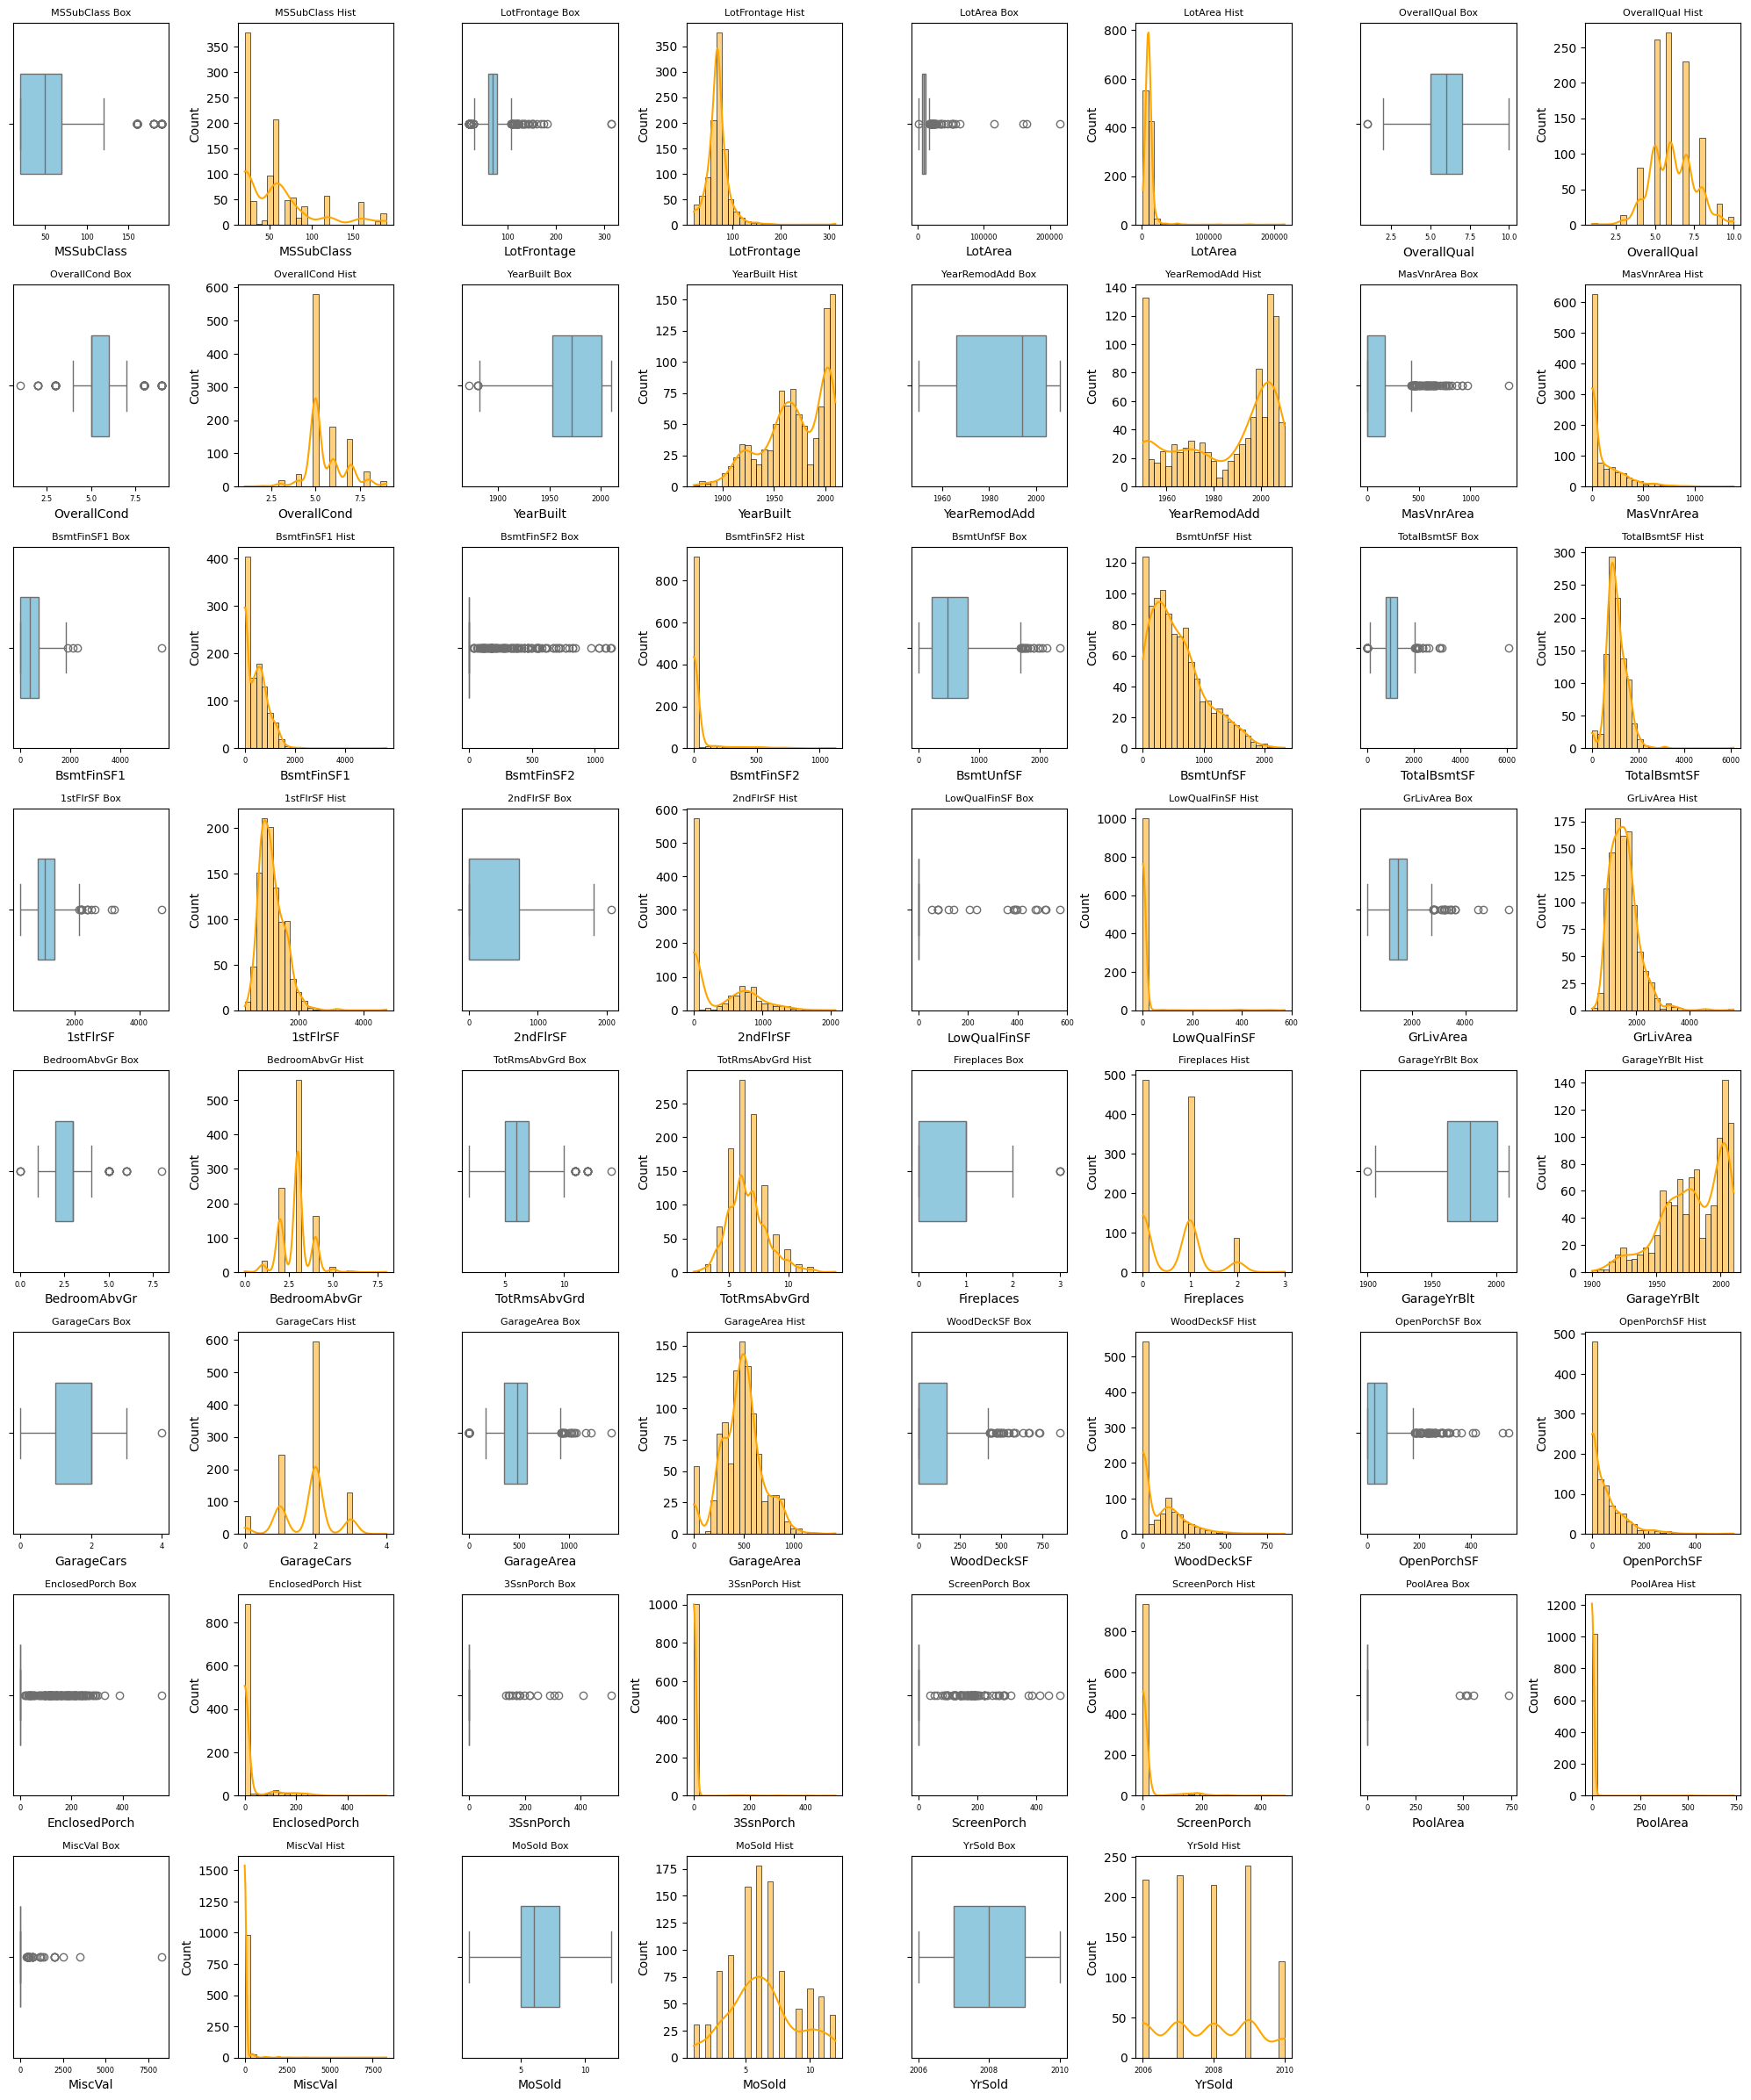

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = X_train_num.select_dtypes(include=['int64','float64']).columns
n_features = len(numeric_cols)

# Layout: 4 features per row, each feature takes 2 columns (boxplot + histogram)
features_per_row = 4
n_cols = features_per_row * 2  # 2 subplots per feature
n_rows = math.ceil(n_features / features_per_row)

plt.figure(figsize=(n_cols*2.5, n_rows*3))  # Adjust figure size

for i, col in enumerate(numeric_cols):
    # Compute subplot position
    pos_box = i*2 + 1  # Boxplot
    pos_hist = i*2 + 2 # Histogram
    
    # Boxplot
    plt.subplot(n_rows, n_cols, pos_box)
    sns.boxplot(x=X_train_num[col], color='skyblue', width=0.5)
    plt.title(f'{col} Box', fontsize=8)
    plt.xticks(fontsize=6)
    
    # Histogram
    plt.subplot(n_rows, n_cols, pos_hist)
    sns.histplot(X_train_num[col], bins=25, kde=True, color='orange')
    plt.title(f'{col} Hist', fontsize=8)
    plt.xticks(fontsize=6)

plt.tight_layout(pad=1.0)
plt.show()

### Box-Cox
Identify which features can receive Box-Cox

In [29]:
import numpy as np

# numeric features
numeric_cols = X_train_num.select_dtypes(include=['int64','float64']).columns

boxcox_candidates = []

for col in numeric_cols:
    if (X_train_num[col] > 0).all():     # all strictly positive
        boxcox_candidates.append(col)

boxcox_candidates


['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageYrBlt',
 'MoSold',
 'YrSold']

choose which features need Box-Cox

Absolute skewness:
LotArea         11.649804
LotFrontage      2.810542
1stFlrSF         1.512196
GrLivArea        1.485364
MSSubClass       1.419477
TotRmsAbvGrd     0.682022
OverallCond      0.679408
MoSold           0.266934
OverallQual      0.147040
YrSold           0.089067
YearRemodAdd     0.499876
YearBuilt        0.620145
GarageYrBlt      0.699165
dtype: float64
Columns to transform (|skew| > 0.75):
['LotArea', 'LotFrontage', '1stFlrSF', 'GrLivArea', 'MSSubClass']


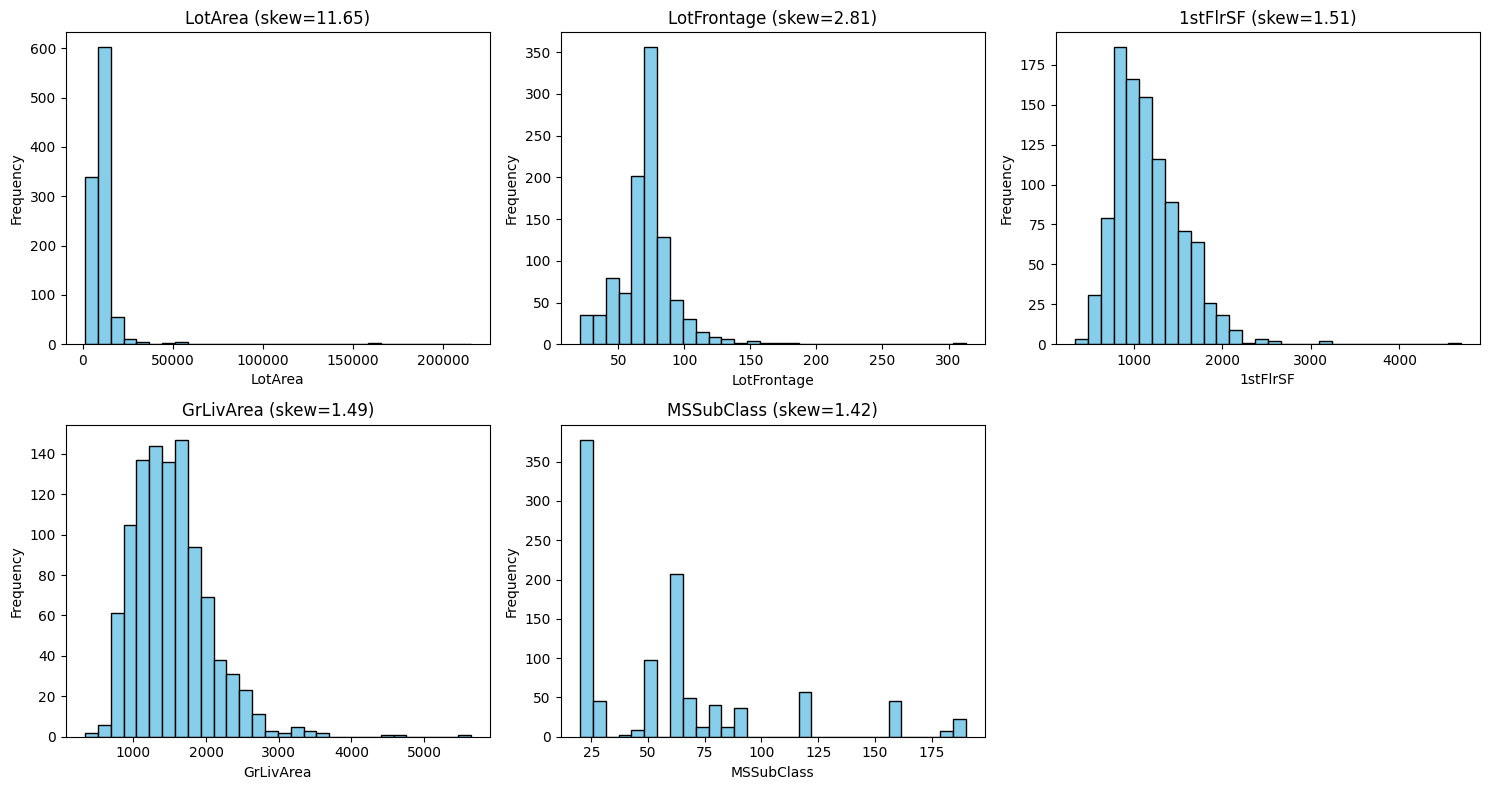

In [30]:
# Calculate skewness for candidate columns
skewed_cols = X_train_num[boxcox_candidates].skew().sort_values(ascending=False)

# Print absolute skewness
print("Absolute skewness:")
print(np.abs(skewed_cols))

# Select columns with high skewness (>0.75)
to_transform = [col for col in skewed_cols.index 
                if abs(skewed_cols[col]) > 0.75 and col in boxcox_candidates]

print("Columns to transform (|skew| > 0.75):")
print(to_transform)


# Plot histograms
num_cols = len(to_transform)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row  # ceil division

plt.figure(figsize=(cols_per_row*5, rows*4))

for i, col in enumerate(to_transform, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.hist(X_train_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} (skew={X_train_num[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


### Yeo-Johnson

MiscVal          16.792815
PoolArea         14.841596
LotArea          11.649804
3SsnPorch         9.857927
LowQualFinSF      9.100801
BsmtFinSF2        4.350905
ScreenPorch       4.141935
EnclosedPorch     3.279818
LotFrontage       2.810542
OpenPorchSF       2.292399
MasVnrArea        2.218286
BsmtFinSF1        2.002756
TotalBsmtSF       1.848717
WoodDeckSF        1.591136
1stFlrSF          1.512196
GrLivArea         1.485364
MSSubClass        1.419477
BsmtUnfSF         0.900066
2ndFlrSF          0.812392
TotRmsAbvGrd      0.682022
OverallCond       0.679408
Fireplaces        0.652798
MoSold            0.266934
BedroomAbvGr      0.257799
OverallQual       0.147040
YrSold            0.089067
GarageArea        0.071858
GarageCars        0.440035
YearRemodAdd      0.499876
YearBuilt         0.620145
GarageYrBlt       0.699165
dtype: float64
Columns to transform (|skew| > 0.75):
['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 

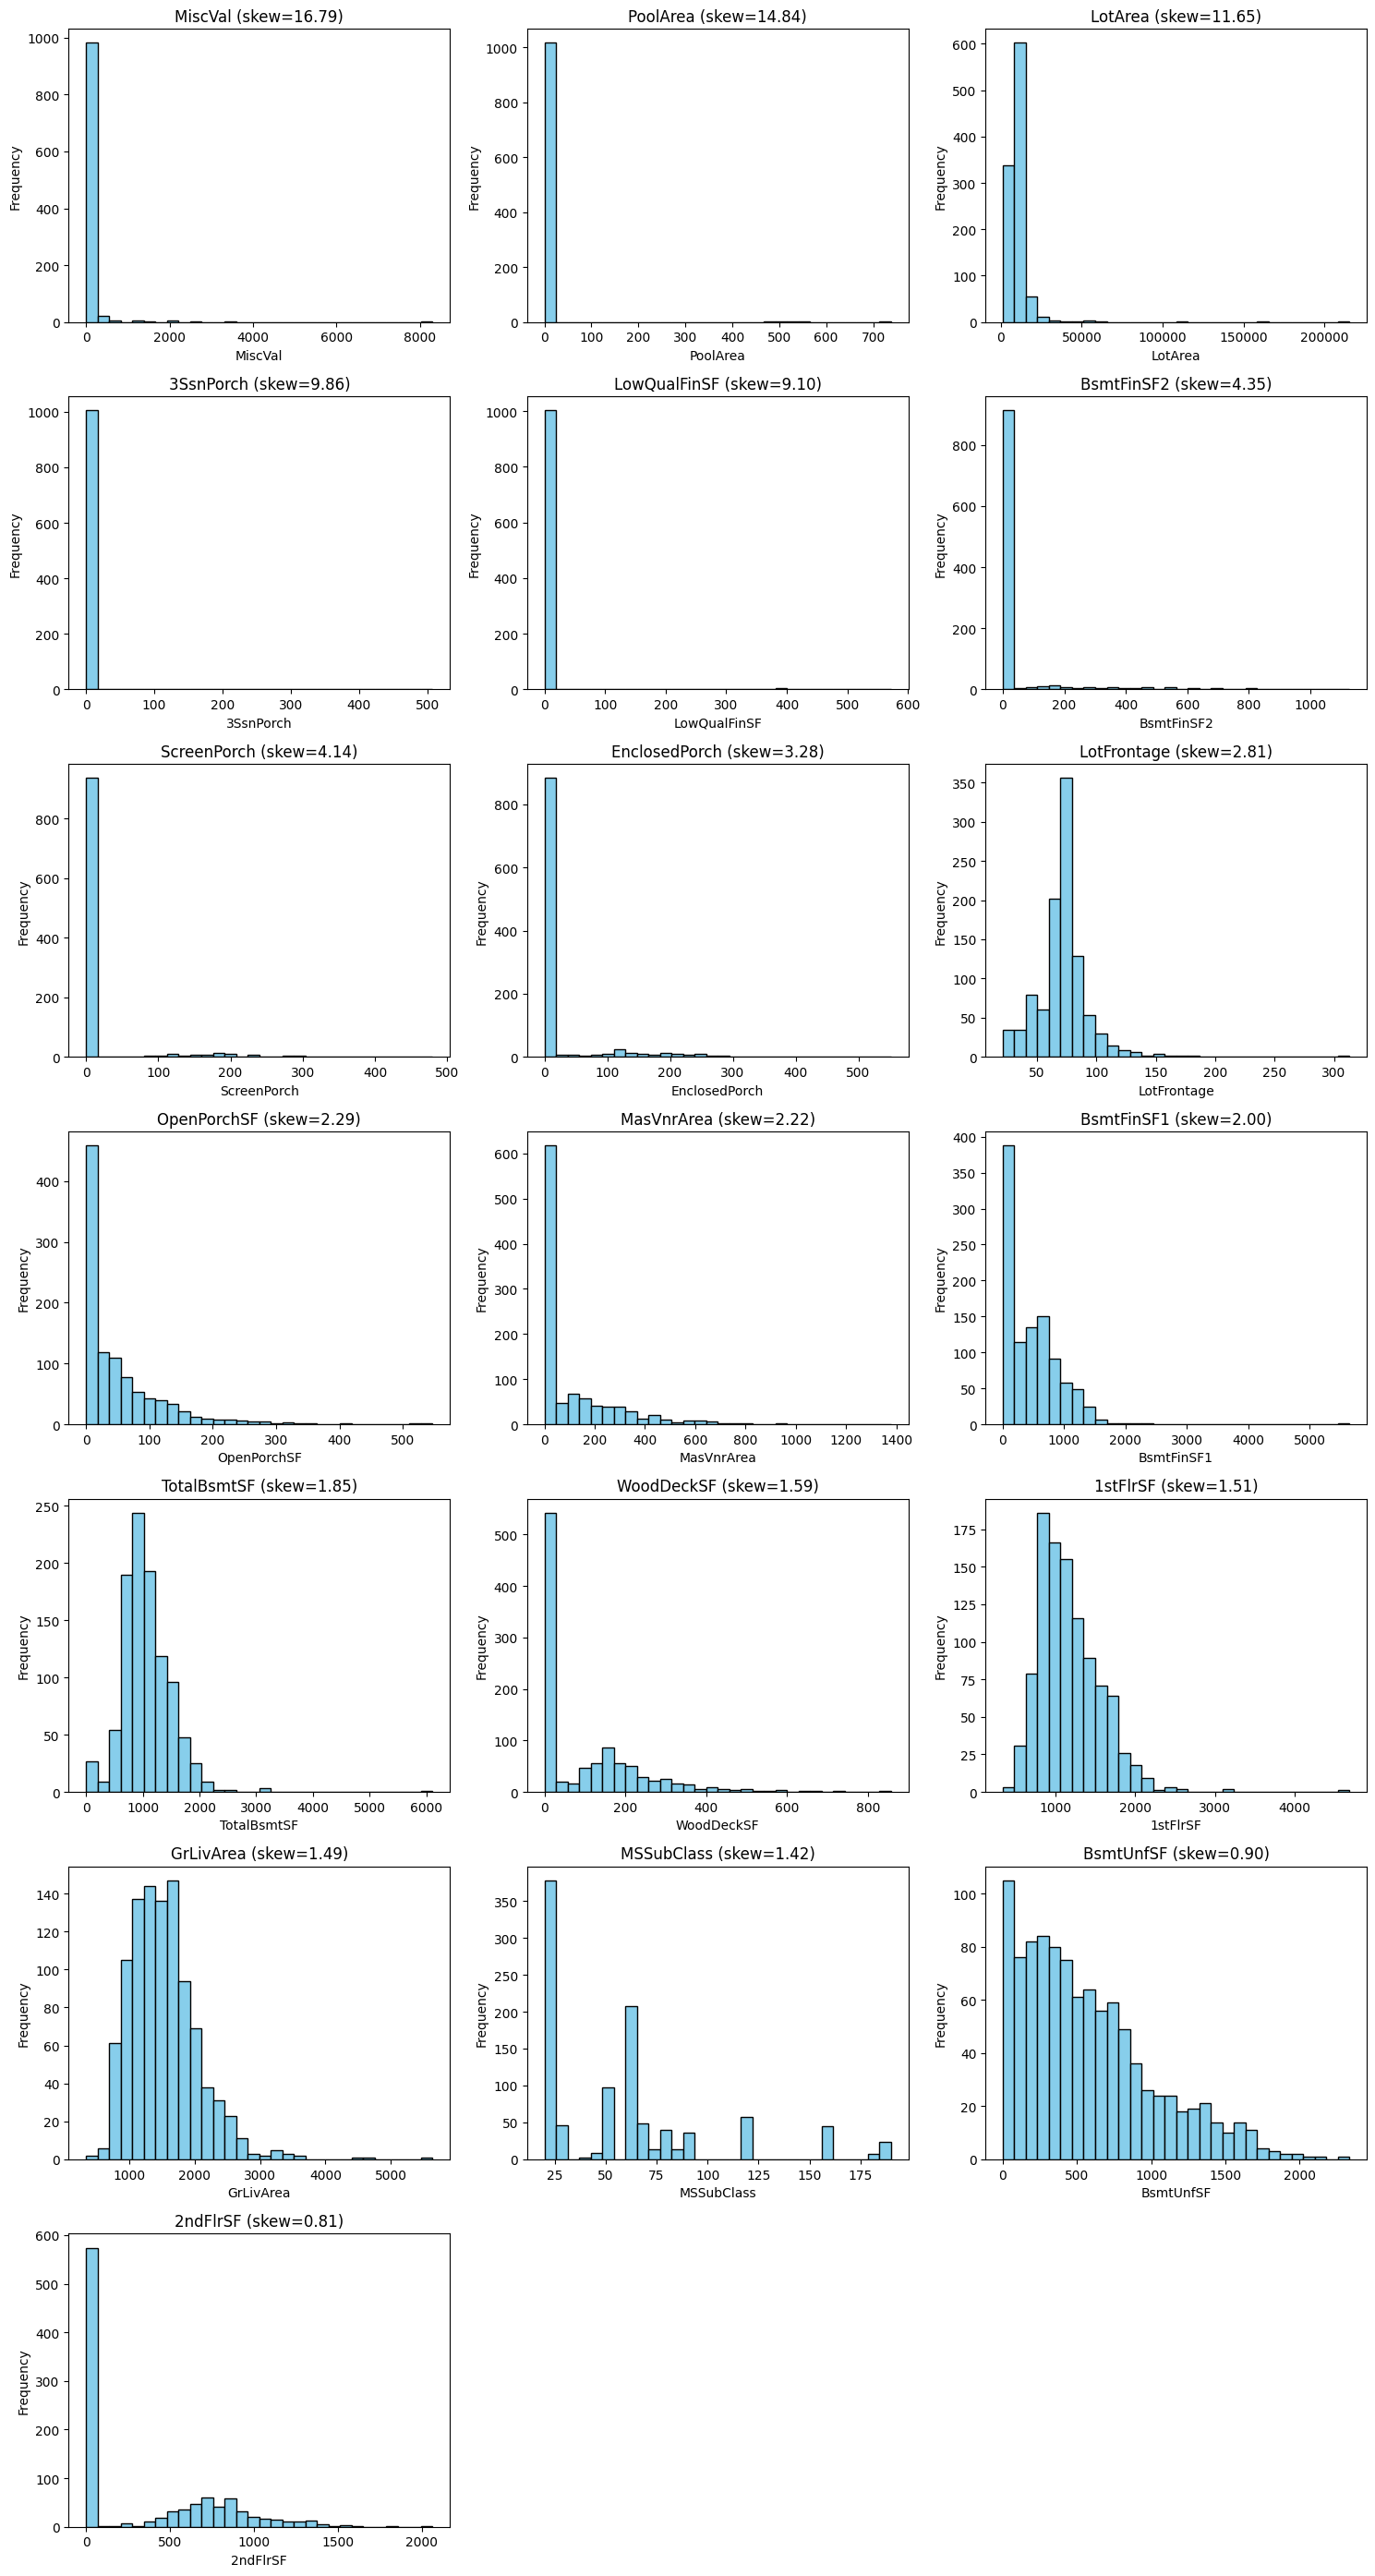

In [31]:

# 1️⃣ Numeric features
numeric_cols = X_train_num.select_dtypes(include=['int64','float64']).columns

# 2️⃣ Calculate skewness for all numeric columns
skewed_cols = X_train_num[numeric_cols].skew().sort_values(ascending=False)
print(np.abs(skewed_cols))

# 3️⃣ Select columns with high skewness (>0.75)
to_transform = [col for col in skewed_cols.index if abs(skewed_cols[col]) > 0.75]
print("Columns to transform (|skew| > 0.75):")
print(to_transform)

# 4️⃣ Visualize original histograms
num_cols = len(to_transform)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row*5, rows*4))
for i, col in enumerate(to_transform, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.hist(X_train_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} (skew={X_train_num[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


applying Yeo-Johnson only on the features that still had a reduction in outliers, with full comparison

In [32]:
numeric_cols = X_train_num.select_dtypes(include=['int64', 'float64']).columns
skewed_cols = X_train_num[numeric_cols].skew().sort_values(ascending=False)
to_transform = [col for col in skewed_cols.index if abs(skewed_cols[col]) > 0.75]
print(to_transform)
X_train_num[to_transform]
X_train_num.to_csv("fucked_features.csv", index=False)


['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 'LotFrontage', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'WoodDeckSF', '1stFlrSF', 'GrLivArea', 'MSSubClass', 'BsmtUnfSF', '2ndFlrSF']


Columns to transform: ['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 'LotFrontage', 'OpenPorchSF', 'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', 'WoodDeckSF', '1stFlrSF', 'GrLivArea', 'MSSubClass', 'BsmtUnfSF', '2ndFlrSF']


Feature  Skew_Before  Outliers_Before  Outliers_After  \
16     MSSubClass     1.419477               75               0   
10     MasVnrArea     2.218286               62               0   
9     OpenPorchSF     2.292399               54               0   
13     WoodDeckSF     1.591136               26               0   
17      BsmtUnfSF     0.900066               18               0   
15      GrLivArea     1.485364               21               7   
14       1stFlrSF     1.512196               13               6   
12    TotalBsmtSF     1.848717               43              38   
11     BsmtFinSF1     2.002756                4               0   
18       2ndFlrSF     0.812392                1               0   
1        PoolArea    14.841596                5               5   
7   EnclosedPorch     3.279818              138             138   
6     ScreenPorch     4.141935               86              86   
5      BsmtFinSF2     4.350905              111             111   
4    LowQualFinSF     9.100801               19              19   
3       3SsnPorch     9.857927               17              17   
0         MiscVal    16.792815               40              40   
8     LotFrontage     2.810542               80              90   
2         LotArea    11.649804               46              92   

    Outlier_Reduction  
16                 75  
10                 62  
9                  54  
13                 26  
17                 18  
15                 14  
14                  7  
12                  5  
11                  4  
18                  1  
1                   0  
7                   0  
6                   0  
5                   0  
4                   0  
3                   0  
0                   0  
8                 -10  
2                 -46

Features to re-transform: ['MSSubClass', 'MasVnrArea', 'OpenPorchSF', 'WoodDeckSF', 'BsmtUnfSF', 'GrLivArea', '1stFlrSF', 'TotalBsmtSF', 'BsmtFinSF1', '2ndFlrSF']


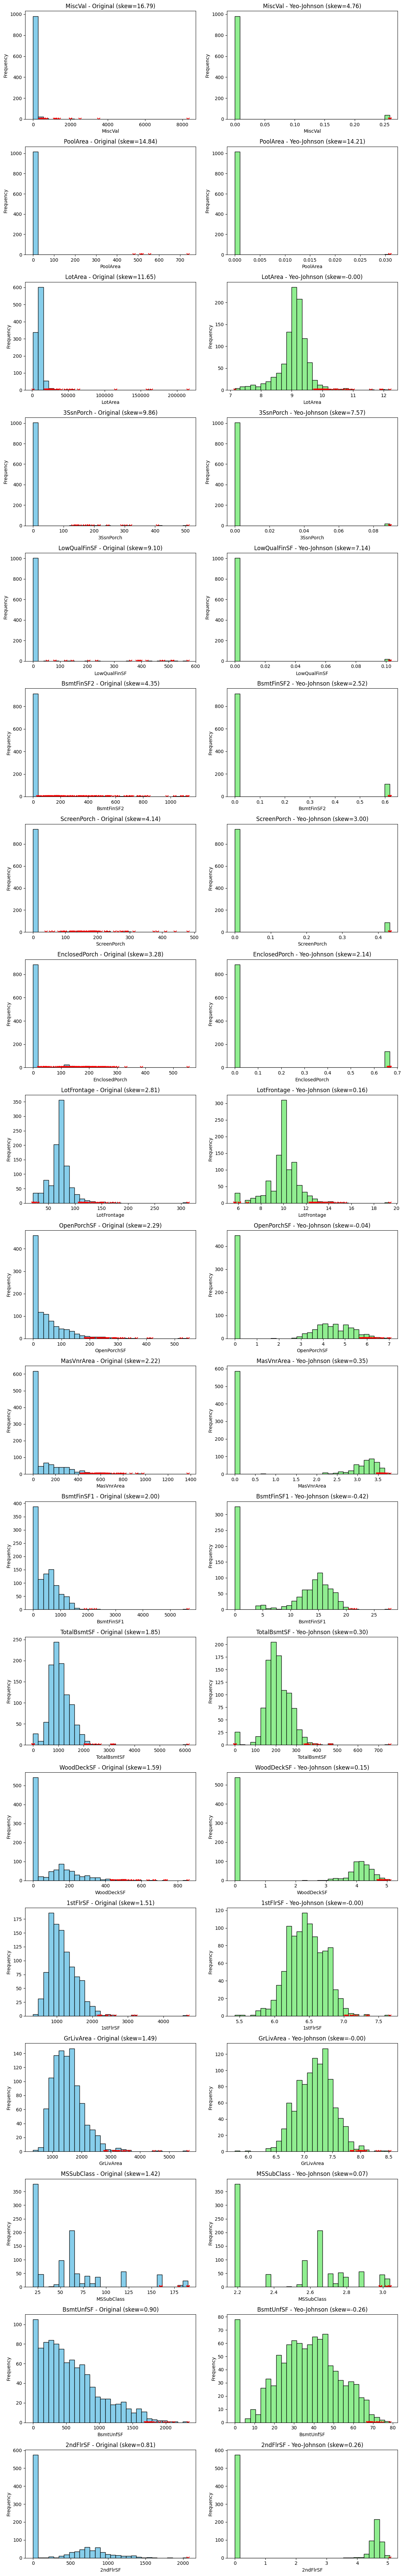

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer

# Copy of training data
X_train_tr = X_train_num.copy()

# 1️⃣ Detect numeric skewed features
numeric_cols = X_train_tr.select_dtypes(include=['int64','float64']).columns
skewed_cols = X_train_tr[numeric_cols].skew().sort_values(ascending=False)
to_transform = [col for col in skewed_cols.index if abs(skewed_cols[col]) > 0.75]
print("Columns to transform:", to_transform)

# 2️⃣ Prepare a list to store outlier info
outlier_info_list = []

# 3️⃣ Apply Yeo-Johnson and compute outliers
pt = PowerTransformer(method='yeo-johnson', standardize=False)

for col in to_transform:
    # Original IQR and outliers
    Q1 = X_train_tr[col].quantile(0.25)
    Q3 = X_train_tr[col].quantile(0.75)
    IQR = Q3 - Q1
    mask_before = (X_train_tr[col] < Q1 - 1.5*IQR) | (X_train_tr[col] > Q3 + 1.5*IQR)
    n_before = mask_before.sum()
    
    # Save original values for plotting
    orig_values = X_train_tr[col].copy()
    
    # Transform
    X_train_tr[[col]] = pt.fit_transform(X_train_tr[[col]])
    
    # New IQR and outliers after transformation
    Q1_new = X_train_tr[col].quantile(0.25)
    Q3_new = X_train_tr[col].quantile(0.75)
    IQR_new = Q3_new - Q1_new
    mask_after = (X_train_tr[col] < Q1_new - 1.5*IQR_new) | (X_train_tr[col] > Q3_new + 1.5*IQR_new)
    n_after = mask_after.sum()
    
    # Save info
    outlier_info_list.append({
        'Feature': col,
        'Skew_Before': skewed_cols[col],
        'Outliers_Before': n_before,
        'Outliers_After': n_after,
        'Outlier_Reduction': n_before - n_after,
        'Original_Values': orig_values,
        'Original_Outlier_Mask': mask_before,
        'Transformed_Outlier_Mask': mask_after
    })

# 4️⃣ Convert to DataFrame
outlier_summary_df = pd.DataFrame(outlier_info_list)
outlier_summary_df = outlier_summary_df.sort_values(by='Outlier_Reduction', ascending=False)
display(outlier_summary_df[['Feature','Skew_Before','Outliers_Before','Outliers_After','Outlier_Reduction']])

# 5️⃣ Re-transform features that reduced outliers
features_to_retransform = outlier_summary_df.loc[outlier_summary_df['Outlier_Reduction'] > 0, 'Feature'].tolist()
print("Features to re-transform:", features_to_retransform)



# 6️⃣ Plot side-by-side histograms
cols_per_row = 2  # Original vs Transformed
num_features = len(to_transform)
rows = num_features

plt.figure(figsize=(12, rows*4))

for i, row in enumerate(outlier_info_list, 1):
    col = row['Feature']
    orig = row['Original_Values']
    mask_before = row['Original_Outlier_Mask']
    
    # Original
    plt.subplot(rows, 2, 2*i-1)
    plt.hist(orig, bins=30, color='skyblue', edgecolor='black')
    plt.scatter(orig[mask_before], np.zeros_like(orig[mask_before]), color='red', marker='x', label='Outliers')
    plt.title(f"{col} - Original (skew={row['Skew_Before']:.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    
    # Transformed (after possible re-transform)
    plt.subplot(rows, 2, 2*i)
    plt.hist(X_train_tr[col], bins=30, color='lightgreen', edgecolor='black')
    plt.scatter(X_train_tr[col][mask_before], np.zeros_like(X_train_tr[col][mask_before]), color='red', marker='x', label='Original Outliers')
    plt.title(f"{col} - Yeo-Johnson (skew={X_train_tr[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# Transforem features in original data that decreased in outliers after yeo-johnson trans
if features_to_retransform:
    X_train_num[features_to_retransform] = pt.fit_transform(X_train_num[features_to_retransform])
    X_test_num[features_to_retransform] = pt.transform(X_test_num[features_to_retransform])


**Tip**: 

- Sometimes a lift in performance can be achieved by first standardizing the raw dataset prior to performing a Yeo-Johnson transform.

#### Again Visualising Box-cox, Yeo-johnson

Absolute skewness:
LotArea         11.649804
LotFrontage      2.810542
TotRmsAbvGrd     0.682022
OverallCond      0.679408
MoSold           0.266934
OverallQual      0.147040
YrSold           0.089067
MSSubClass       0.070174
GrLivArea        0.000148
1stFlrSF         0.000828
YearRemodAdd     0.499876
YearBuilt        0.620145
GarageYrBlt      0.699165
dtype: float64
Columns to transform (|skew| > 0.75):
['LotArea', 'LotFrontage']


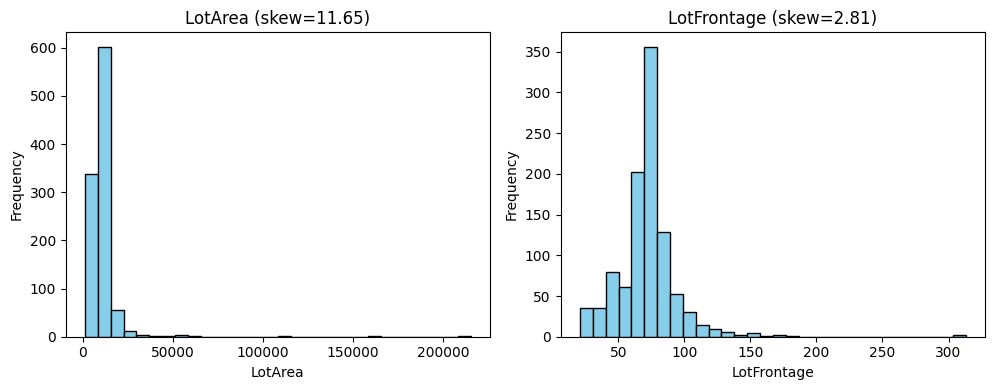

In [34]:
# Calculate skewness for candidate columns
skewed_cols = X_train_num[boxcox_candidates].skew().sort_values(ascending=False)

# Print absolute skewness
print("Absolute skewness:")
print(np.abs(skewed_cols))

# Select columns with high skewness (>0.75)
to_transform = [col for col in skewed_cols.index 
                if abs(skewed_cols[col]) > 0.75 and col in boxcox_candidates]

print("Columns to transform (|skew| > 0.75):")
print(to_transform)


# Plot histograms
num_cols = len(to_transform)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row  # ceil division

plt.figure(figsize=(cols_per_row*5, rows*4))

for i, col in enumerate(to_transform, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.hist(X_train_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} (skew={X_train_num[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


MiscVal          16.792815
PoolArea         14.841596
LotArea          11.649804
3SsnPorch         9.857927
LowQualFinSF      9.100801
BsmtFinSF2        4.350905
ScreenPorch       4.141935
EnclosedPorch     3.279818
LotFrontage       2.810542
TotRmsAbvGrd      0.682022
OverallCond       0.679408
Fireplaces        0.652798
MasVnrArea        0.352005
TotalBsmtSF       0.299737
MoSold            0.266934
BedroomAbvGr      0.257799
2ndFlrSF          0.256315
WoodDeckSF        0.149558
OverallQual       0.147040
YrSold            0.089067
GarageArea        0.071858
MSSubClass        0.070174
GrLivArea         0.000148
1stFlrSF          0.000828
OpenPorchSF       0.042548
BsmtUnfSF         0.262140
BsmtFinSF1        0.419350
GarageCars        0.440035
YearRemodAdd      0.499876
YearBuilt         0.620145
GarageYrBlt       0.699165
dtype: float64
Columns to transform (|skew| > 0.75):
['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF', 'BsmtFinSF2', 'ScreenPorch', 'EnclosedPorch', 

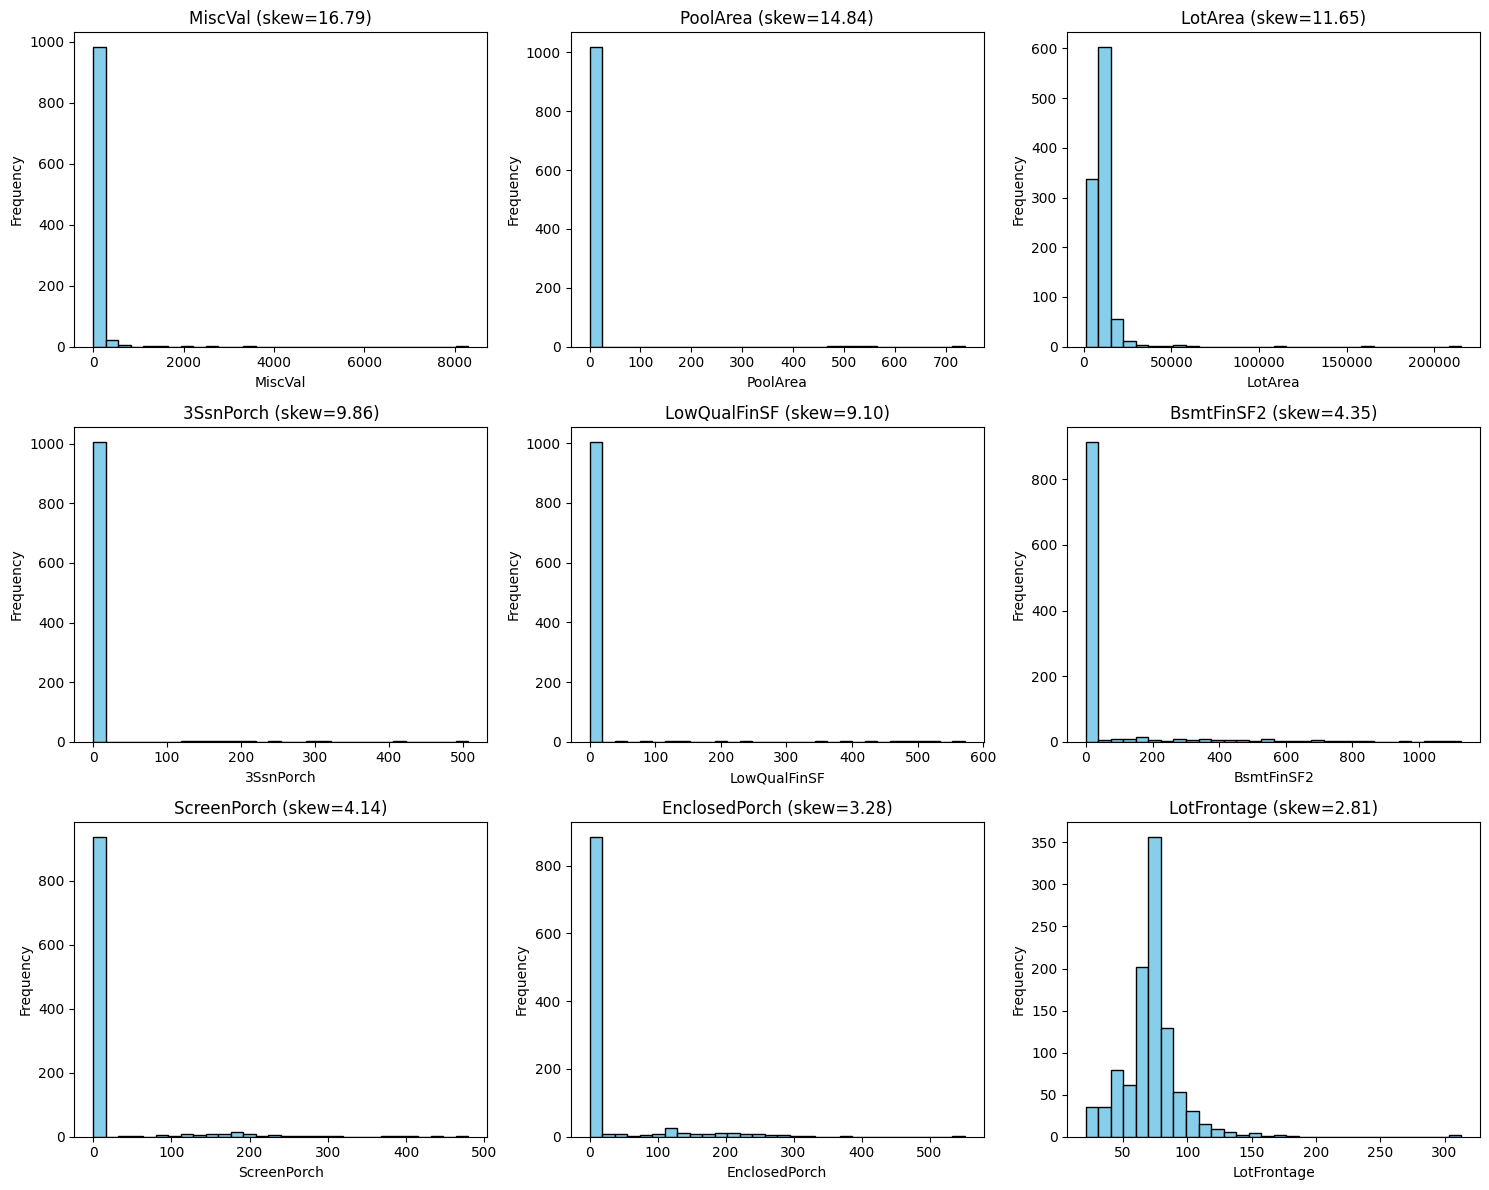

In [35]:

# 1️⃣ Numeric features
numeric_cols = X_train_num.select_dtypes(include=['int64','float64']).columns

# 2️⃣ Calculate skewness for all numeric columns
skewed_cols = X_train_num[numeric_cols].skew().sort_values(ascending=False)
print(np.abs(skewed_cols))

# 3️⃣ Select columns with high skewness (>0.75)
to_transform = [col for col in skewed_cols.index if abs(skewed_cols[col]) > 0.75]
print("Columns to transform (|skew| > 0.75):")
print(to_transform)

# 4️⃣ Visualize original histograms
num_cols = len(to_transform)
cols_per_row = 3
rows = (num_cols + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(cols_per_row*5, rows*4))
for i, col in enumerate(to_transform, 1):
    plt.subplot(rows, cols_per_row, i)
    plt.hist(X_train_num[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f"{col} (skew={X_train_num[col].skew():.2f})")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [36]:
for col in X_train_num.columns:
    top_freq = X_train_num[col].value_counts(normalize=True).iloc[0]
    if top_freq > 0.5:
        print(f"{col}: most frequent value = {top_freq:.2f}")


OverallCond: most frequent value = 0.57
MasVnrArea: most frequent value = 0.57
BsmtFinSF2: most frequent value = 0.89
2ndFlrSF: most frequent value = 0.56
LowQualFinSF: most frequent value = 0.98
BedroomAbvGr: most frequent value = 0.55
GarageCars: most frequent value = 0.58
WoodDeckSF: most frequent value = 0.53
EnclosedPorch: most frequent value = 0.86
3SsnPorch: most frequent value = 0.98
ScreenPorch: most frequent value = 0.92
PoolArea: most frequent value = 1.00
MiscVal: most frequent value = 0.96


# Outliers

#### Z-Score

In [37]:
from scipy import stats

z_scores = np.abs(stats.zscore(X_train_num[numeric_cols]))
z_outliers = (z_scores > 3).sum(axis=0)
z_outlier_df = pd.DataFrame({'Feature': numeric_cols, 'Num_Z_Outliers': z_outliers})
print("\nZ-score Outlier Summary:")
print(z_outlier_df[z_outlier_df['Num_Z_Outliers']>0].sort_values(by='Num_Z_Outliers', ascending=False))


Z-score Outlier Summary:
                     Feature  Num_Z_Outliers
EnclosedPorch  EnclosedPorch              37
ScreenPorch      ScreenPorch              36
BsmtFinSF2        BsmtFinSF2              33
TotalBsmtSF      TotalBsmtSF              31
OverallCond      OverallCond              22
3SsnPorch          3SsnPorch              17
LowQualFinSF    LowQualFinSF              13
LotFrontage      LotFrontage              12
MiscVal              MiscVal              12
LotArea              LotArea              11
TotRmsAbvGrd    TotRmsAbvGrd               9
BedroomAbvGr    BedroomAbvGr               8
GrLivArea          GrLivArea               5
1stFlrSF            1stFlrSF               5
PoolArea            PoolArea               5
Fireplaces        Fireplaces               3
GarageArea        GarageArea               3
OverallQual      OverallQual               3
GarageYrBlt      GarageYrBlt               2
GarageCars        GarageCars               1
YearBuilt          YearBuilt 

#### IQR

In [38]:
numeric_cols = X_train_num.select_dtypes(include=['int64','float64']).columns


outlier_summary = pd.DataFrame(columns=['Feature', 'Num_Outliers', 'Top_Outliers'])

for col in numeric_cols:
    Q1 = X_train_num[col].quantile(0.25)
    Q3 = X_train_num[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_mask = (X_train_num[col] < Q1 - 1.5*IQR) | (X_train_num[col] > Q3 + 1.5*IQR)
    num_outliers = outlier_mask.sum()
    top_outliers = X_train_num[col][outlier_mask].sort_values(ascending=False).head(5).values
    if num_outliers > 0:
        outlier_summary = pd.concat([outlier_summary, 
                                     pd.DataFrame({'Feature':[col],
                                                   'Num_Outliers':[num_outliers],
                                                   'Top_Outliers':[top_outliers]})])

# Show a structured table of outliers
print("IQR Outlier Summary:")
print(outlier_summary.sort_values(by="Num_Outliers", ascending=False))

IQR Outlier Summary:
         Feature Num_Outliers  \
0  EnclosedPorch          138   
0     BsmtFinSF2          111   
0    ScreenPorch           86   
0    OverallCond           85   
0    LotFrontage           80   
0     GarageArea           73   
0        LotArea           46   
0        MiscVal           40   
0    TotalBsmtSF           38   
0   BedroomAbvGr           22   
0   TotRmsAbvGrd           21   
0   LowQualFinSF           19   
0      3SsnPorch           17   
0      GrLivArea            7   
0       1stFlrSF            6   
0       PoolArea            5   
0      YearBuilt            4   
0     Fireplaces            3   
0    OverallQual            2   
0    GarageYrBlt            1   
0     GarageCars            1   

                                        Top_Outliers  
0                [552.0, 386.0, 330.0, 301.0, 293.0]  
0           [1127.0, 1120.0, 1085.0, 1080.0, 1031.0]  
0                [480.0, 440.0, 410.0, 385.0, 374.0]  
0                          [9.0,

#### IQR Capping

In [39]:
import numpy as np
import pandas as pd

# Copy data to preserve original
X_train_out = X_train_num.copy()
X_test_out = X_test_num.copy()

# IQR method
def handle_outliers_iqr(df, multiplier=1.5):
    df_out = df.copy()
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        # Clip outliers to boundaries
        df_out[col] = df_out[col].clip(lower, upper)
    return df_out

X_train_out = handle_outliers_iqr(X_train_out)
X_test_out = handle_outliers_iqr(X_test_out)


### Winsorization

#### Isolation Forest (Model-Based)

#### Local Outlier Factor (LOF)

Visualise Outliers

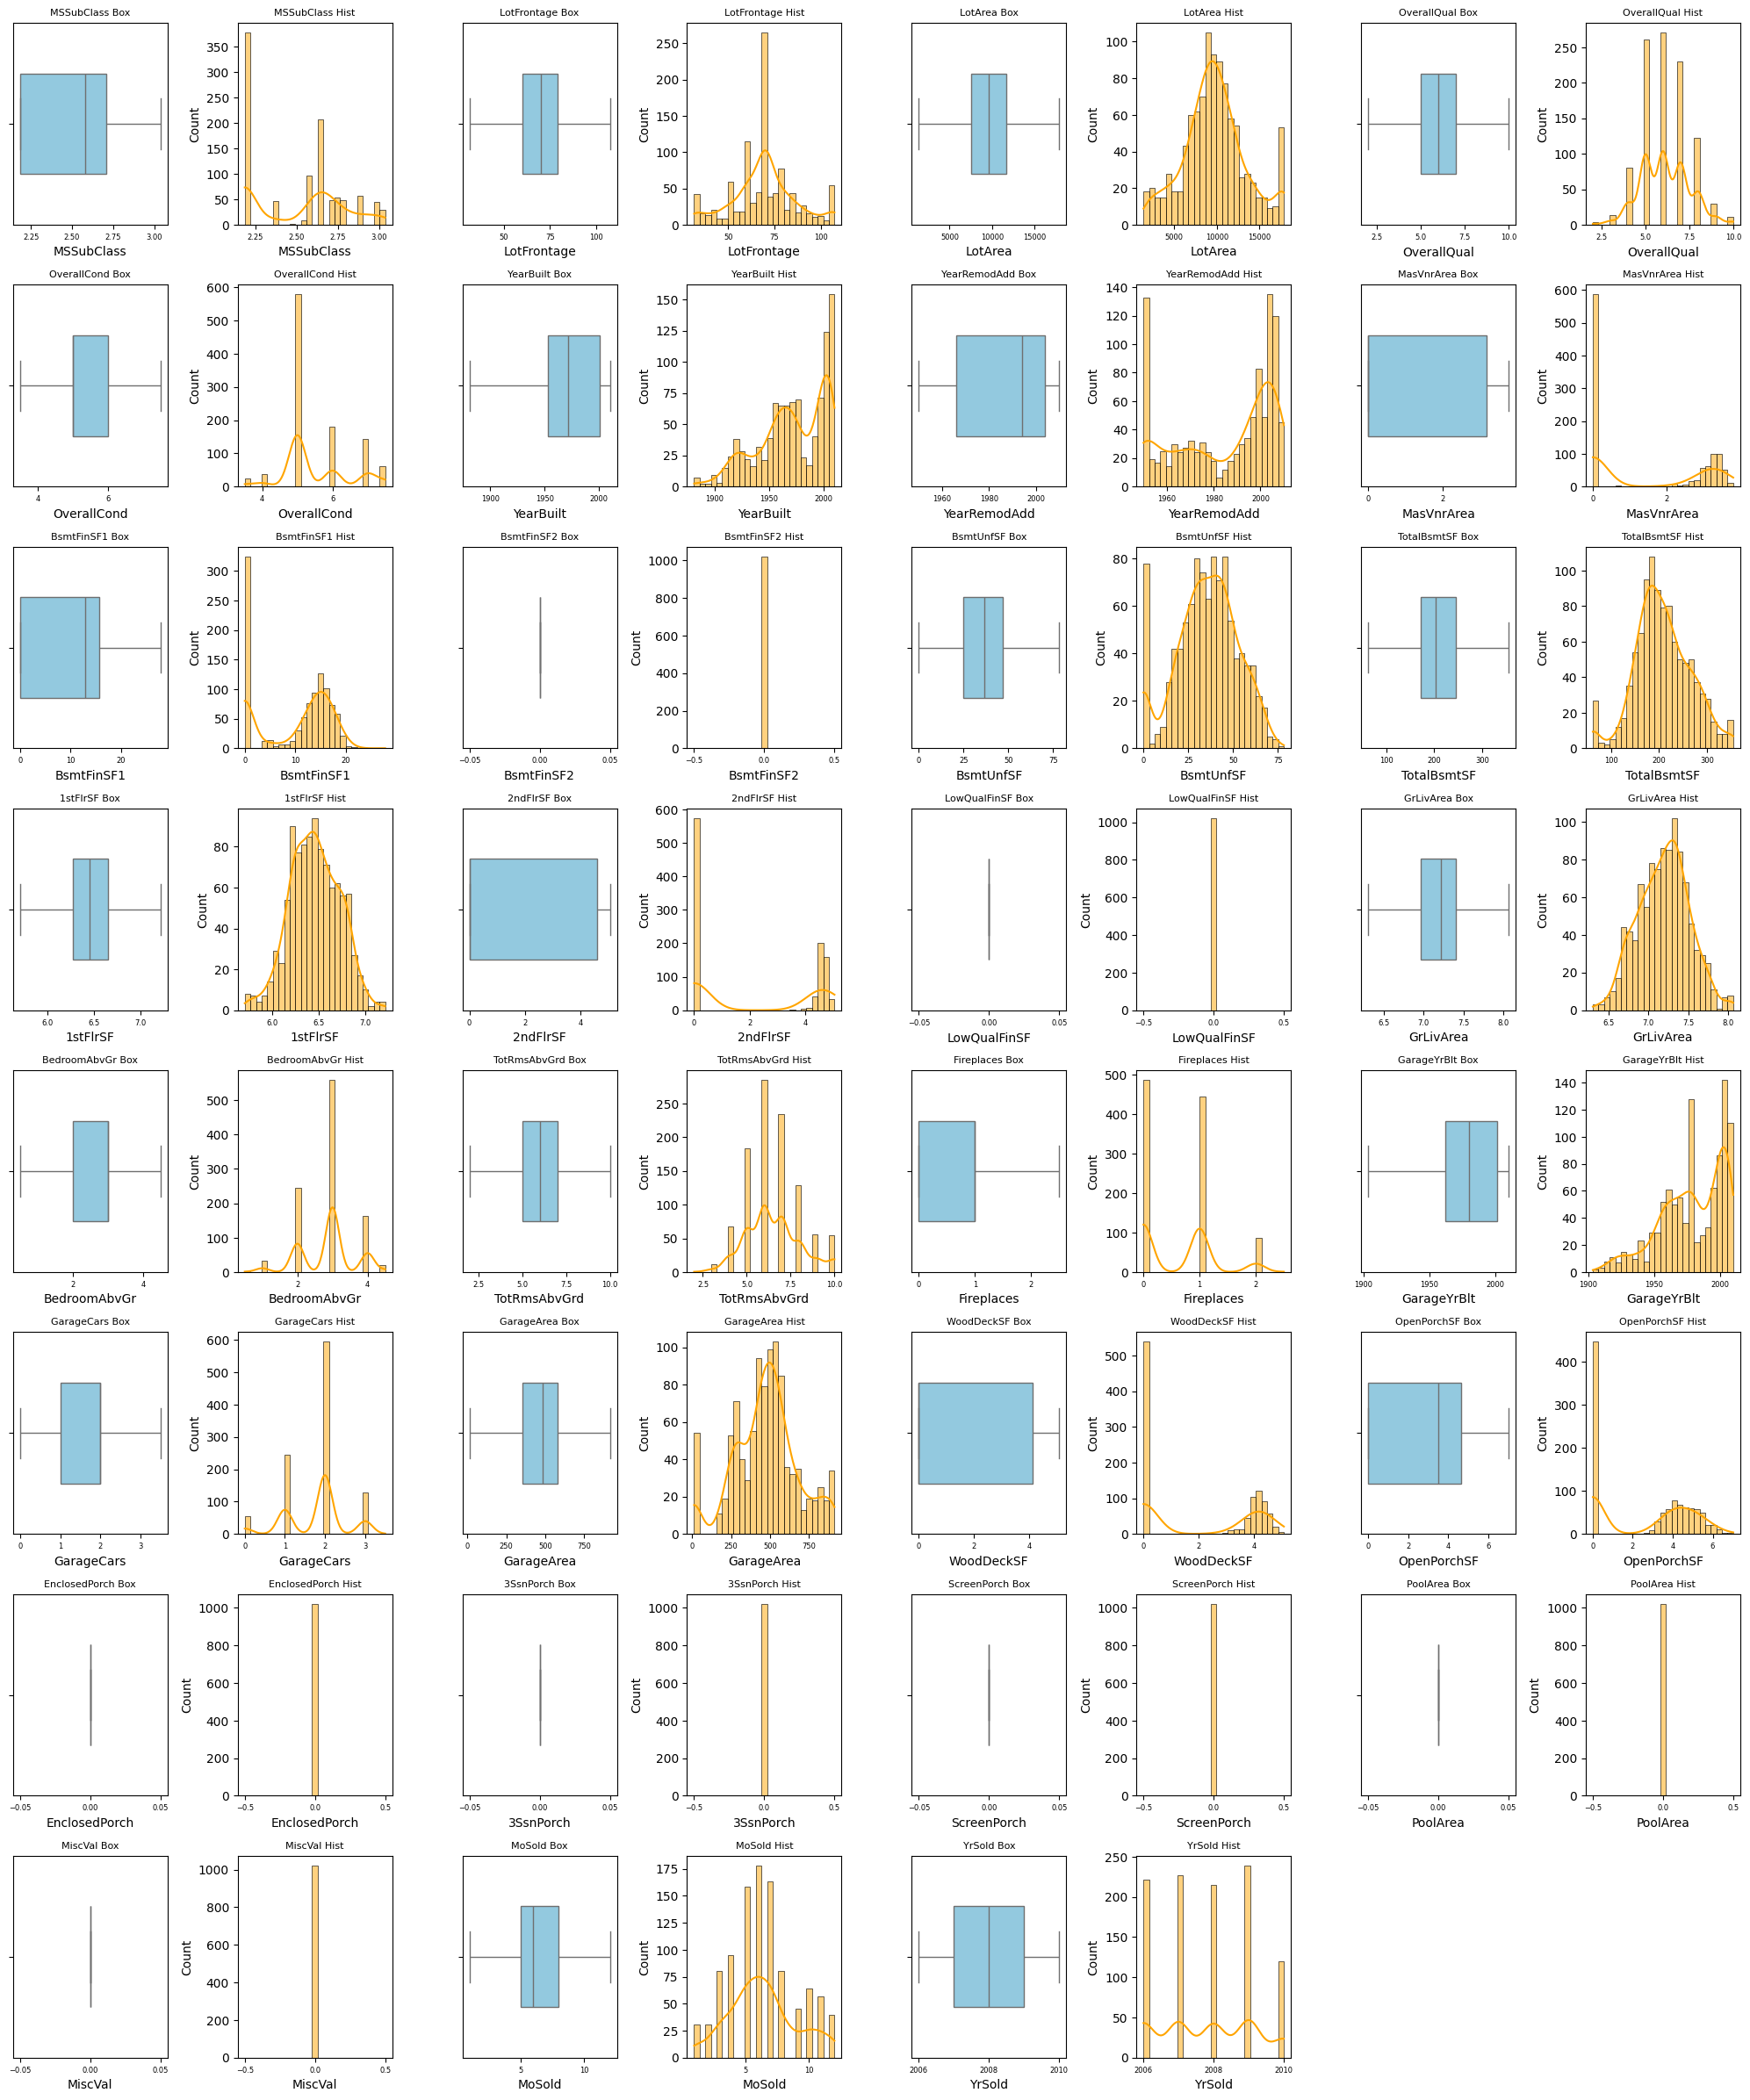

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numeric_cols = X_train_out.select_dtypes(include=['int64','float64']).columns
n_features = len(numeric_cols)

# Layout: 4 features per row, each feature takes 2 columns (boxplot + histogram)
features_per_row = 4
n_cols = features_per_row * 2  # 2 subplots per feature
n_rows = math.ceil(n_features / features_per_row)

plt.figure(figsize=(n_cols*2.5, n_rows*3))  # Adjust figure size

for i, col in enumerate(numeric_cols):
    # Compute subplot position
    pos_box = i*2 + 1  # Boxplot
    pos_hist = i*2 + 2 # Histogram
    
    # Boxplot
    plt.subplot(n_rows, n_cols, pos_box)
    sns.boxplot(x=X_train_out[col], color='skyblue', width=0.5)
    plt.title(f'{col} Box', fontsize=8)
    plt.xticks(fontsize=6)
    
    # Histogram
    plt.subplot(n_rows, n_cols, pos_hist)
    sns.histplot(X_train_out[col], bins=25, kde=True, color='orange')
    plt.title(f'{col} Hist', fontsize=8)
    plt.xticks(fontsize=6)

plt.tight_layout(pad=1.0)
plt.show()

# Fixed Skewed Dist

In [41]:
from sklearn.preprocessing import PowerTransformer

# Copy data
X_train_yj = X_train_out.copy()
X_test_yj = X_test_out.copy()

# Identify numeric columns to transform
skewed_cols = X_train_yj.columns  # or you can pick only highly skewed cols

# Yeo-Johnson
pt = PowerTransformer(method='yeo-johnson')
X_train_yj[skewed_cols] = pt.fit_transform(X_train_yj)
X_test_yj[skewed_cols] = pt.transform(X_test_yj)


### Scaling

In [42]:
from sklearn.preprocessing import RobustScaler

# Copy to preserve
X_train_scaled = X_train_yj.copy()
X_test_scaled = X_test_yj.copy()

scaler = RobustScaler()
X_train_scaled[X_train_scaled.columns] = scaler.fit_transform(X_train_scaled)
X_test_scaled[X_test_scaled.columns] = scaler.transform(X_test_scaled)


# Automated feature generation

### Deep Feature Synthesis

## Reduce dimensionality

In [49]:
import pandas as pd

# Combine column names: numeric + categorical
numeric_cols = X_train_scaled.columns.tolist()
cat_cols = X_train_cat_final.columns.tolist()
all_cols = numeric_cols + cat_cols

# Convert hstacked arrays to DataFrames
X_train_final = pd.DataFrame(X_train_final, columns=all_cols)
X_test_final = pd.DataFrame(X_test_final, columns=all_cols)  # same columns as train

# Save as CSV
X_train_final.to_csv("X_train_final.csv", index=False)
X_test_final.to_csv("X_test_final.csv", index=False)
y_train.to_csv("y_train.csv", index=False)
y_test.to_csv("y_test.csv", index=False)

print("X_train_final.csv and X_test_final.csv saved successfully!")


X_train_final.csv and X_test_final.csv saved successfully!


# Modeling

Numeric columns: 34

Top skewed features (train):
MiscVal          16.792815
PoolArea         14.841596
LotArea          11.649804
3SsnPorch         9.857927
LowQualFinSF      9.100801
BsmtFinSF2        4.350905
ScreenPorch       4.141935
EnclosedPorch     3.279818
LotFrontage       2.810542
TotRmsAbvGrd      0.682022
OverallCond       0.679408
Fireplaces        0.652798
HalfBath          0.639800
BsmtFullBath      0.627581
MasVnrArea        0.352005
TotalBsmtSF       0.299737
MoSold            0.266934
BedroomAbvGr      0.257799
2ndFlrSF          0.256315
WoodDeckSF        0.149558
dtype: float64

Detected 9 skewed features (|skew| > 0.75).

Transform plan examples (first 10):
MiscVal -> ('yeo-johnson', None)
PoolArea -> ('yeo-johnson', None)
LotArea -> ('quantile_uniform', {'n_quantiles': 1000})
3SsnPorch -> ('yeo-johnson', None)
LowQualFinSF -> ('yeo-johnson', None)
BsmtFinSF2 -> ('yeo-johnson', None)
ScreenPorch -> ('yeo-johnson', None)
EnclosedPorch -> ('yeo-johnson', None)
LotFro

ValueError: num must be an integer with 1 <= num <= 6, not 7

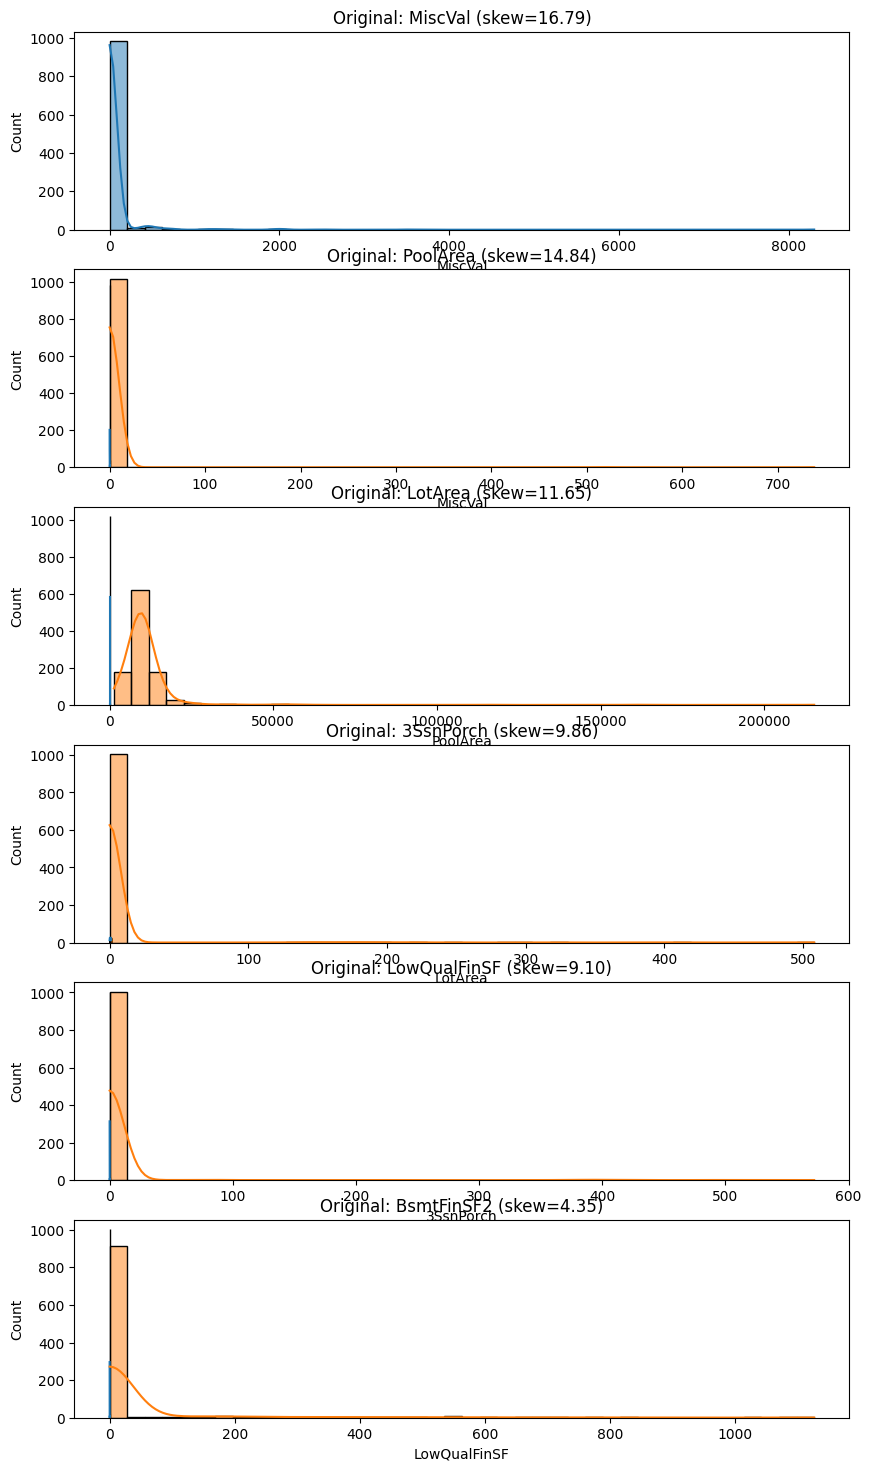

In [ ]:
# Full notebook: automatic skew-fix -> outlier handling -> scaling -> quick model compare
# Paste into a Jupyter cell and run.

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest, RandomForestRegressor
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer

# -------------------------
# CONFIG / PARAMETERS
# -------------------------
SKEW_THRESH = 0.75         # |skew| > this considered skewed
QT_ACTIVE = True          # allow QuantileTransformer if extreme skew
QUANTILE_N_QUANTILES = 1000
CLIP_LOWER_Q = 0.01       # lower percentile to clip outliers (after transform)
CLIP_UPPER_Q = 0.99       # upper percentile to clip outliers (after transform)
USE_ISOFOREST = True      # also mark outliers with IsolationForest if wanted
ISOFOREST_CONTAMINATION = 0.01  # expected proportion of outliers (tuneable)
SCALE_METHOD = "standard"    # "standard", "robust", "minmax"
RANDOM_STATE = 42

# -------------------------
# Replace these with your loaded data
# -------------------------
# Example:
# df = pd.read_csv("train.csv")
# y = df['SalePrice']
# X = df.drop(columns=['SalePrice'])
#
# For the notebook assume X_train, X_test, y_train, y_test already exist
# (As in earlier conversation). If you only have df, do a train_test_split here.

# For demonstration, if X_train is not defined, raise an informative error.
try:
    X_train
except NameError:
    raise RuntimeError("Please define X_train, X_test, y_train, y_test before running this cell.")

# We'll work on copies so originals remain safe
X_train_orig = X_train.copy()
X_test_orig = X_test.copy()

# -------------------------
# 1) Identify numeric columns & skewness
# -------------------------
numeric_cols = X_train_orig.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numeric columns: {len(numeric_cols)}")

skew_vals = X_train_orig[numeric_cols].skew().sort_values(ascending=False)
print("\nTop skewed features (train):")
print(skew_vals.head(20))

# Select skewed features by threshold
skewed = skew_vals[skew_vals.abs() > SKEW_THRESH].index.tolist()
print(f"\nDetected {len(skewed)} skewed features (|skew| > {SKEW_THRESH}).")

# -------------------------
# 2) Decide transformation per-feature and apply safely (on copies)
#    Rules:
#      - If feature strictly positive and skew moderately high -> try log1p
#      - If has zeros or negatives -> use Yeo-Johnson
#      - If extremely skewed and monotonic mapping ok -> optionally QuantileTransformer (uniform)
# -------------------------
Xtr = X_train_orig.copy()
Xte = X_test_orig.copy()

# helper to test positivity
def is_strictly_positive(series):
    return (series.dropna() > 0).all()

# record decisions
transform_plan = {}

# Precompute skew magnitudes
for col in skewed:
    s = skew_vals[col]
    positive = is_strictly_positive(X_train_orig[col])
    # choose transform
    if positive and abs(s) < 3.0:
        # use log1p for moderately skewed positive columns
        transform_plan[col] = ("log1p", None)
    elif positive and abs(s) >= 3.0 and QT_ACTIVE:
        # extreme positive skew: consider quantile -> uniform
        transform_plan[col] = ("quantile_uniform", {"n_quantiles": min(QUANTILE_N_QUANTILES, X_train_orig.shape[0])})
    else:
        # fallback to Yeo-Johnson (works with zeros/negatives)
        transform_plan[col] = ("yeo-johnson", None)

print("\nTransform plan examples (first 10):")
for i, (k,v) in enumerate(transform_plan.items()):
    print(k, "->", v)
    if i >= 9:
        break

# Apply transforms
# Keep dict of fitted transformers for reuse on test
fitted_transformers = {}

# 2a) Apply log1p where chosen
for col, (tname, params) in transform_plan.items():
    if tname == "log1p":
        Xtr[col] = np.log1p(Xtr[col])
        Xte[col] = np.log1p(Xte[col])
    elif tname == "yeo-johnson":
        pt = PowerTransformer(method="yeo-johnson", standardize=False)
        # fit on train col reshaped
        Xtr[[col]] = pt.fit_transform(Xtr[[col]])
        Xte[[col]] = pt.transform(Xte[[col]])
        fitted_transformers[col] = pt
    elif tname == "quantile_uniform":
        n_q = params.get("n_quantiles", QUANTILE_N_QUANTILES)
        qt = QuantileTransformer(n_quantiles=n_q, output_distribution="uniform", random_state=RANDOM_STATE)
        # Note: QT requires non-NaN numeric arrays; we assume missing handled earlier
        Xtr[[col]] = qt.fit_transform(Xtr[[col]])
        Xte[[col]] = qt.transform(Xte[[col]])
        fitted_transformers[col] = qt

# -------------------------
# 3) Recompute skew after transforms & show a before/after snapshot for top features
# -------------------------
skew_after = Xtr[numeric_cols].skew().sort_values(ascending=False)
print("\nTop skew after transforms:")
print(skew_after.head(20))

# Small plotting function to compare before/after for a list of columns
def compare_before_after(cols, ncols=2, figsize=(14, 4)):
    nplots = len(cols)
    nrows = int(np.ceil(nplots / ncols))
    plt.figure(figsize=(figsize[0], figsize[1]*nrows))
    for i, c in enumerate(cols, 1):
        ax1 = plt.subplot(nrows, ncols, i)
        sns.histplot(X_train_orig[c].dropna(), kde=True, bins=40)
        ax1.set_title(f"Original: {c} (skew={skew_vals[c]:.2f})")
        ax2 = plt.subplot(nrows, ncols, i+ ncols)
        sns.histplot(Xtr[c].dropna(), kde=True, bins=40)
        ax2.set_title(f"Transformed: {c} (skew={skew_after[c]:.2f})")
    plt.tight_layout()
    
# pick top 6 skewed cols to visualize
top6 = skew_vals.head(6).index.tolist()
compare_before_after(top6, ncols=1, figsize=(10,3))

# -------------------------
# 4) Outlier detection AFTER transforms
#    Strategy: use percentile clipping (Winsorize) guided by quantiles,
#              and optionally mark outliers with IsolationForest to inspect.
# -------------------------
Xout_tr = Xtr.copy()
Xout_te = Xte.copy()

# IQR-based clip function
def clip_to_quantiles(df, lower_q=CLIP_LOWER_Q, upper_q=CLIP_UPPER_Q):
    dfc = df.copy()
    for col in dfc.columns:
        lo = dfc[col].quantile(lower_q)
        hi = dfc[col].quantile(upper_q)
        dfc[col] = dfc[col].clip(lower=lo, upper=hi)
    return dfc

# First apply percentile clipping to all numeric columns
Xout_tr = clip_to_quantiles(Xout_tr[numeric_cols], lower_q=CLIP_LOWER_Q, upper_q=CLIP_UPPER_Q)
Xout_te = clip_to_quantiles(Xout_te[numeric_cols], lower_q=CLIP_LOWER_Q, upper_q=CLIP_UPPER_Q)

# Optionally, run IsolationForest to inspect suspicious records (do NOT automatically drop without inspection)
if USE_ISOFOREST:
    iso = IsolationForest(contamination=ISOFOREST_CONTAMINATION, random_state=RANDOM_STATE)
    iso.fit(Xout_tr.fillna(0))  # isolation forest needs non-null
    iso_pred = iso.predict(Xout_tr.fillna(0))  # -1 outlier, 1 inlier
    n_out = (iso_pred == -1).sum()
    print(f"\nIsolationForest flagged {n_out} samples as outliers (contamination={ISOFOREST_CONTAMINATION}).")
    # If you want to remove them:
    # Xout_tr = Xout_tr.loc[iso_pred == 1]
    # y_train_filtered = y_train.loc[iso_pred == 1]

# -------------------------
# 5) Scaling (choose method)
# -------------------------
Xscaled_tr = Xout_tr.copy()
Xscaled_te = Xout_te.copy()

if SCALE_METHOD == "standard":
    scaler = StandardScaler()
elif SCALE_METHOD == "robust":
    scaler = RobustScaler()
elif SCALE_METHOD == "minmax":
    scaler = MinMaxScaler()
else:
    raise ValueError("Unknown SCALE_METHOD: choose 'standard', 'robust' or 'minmax'")

Xscaled_tr[Xscaled_tr.columns] = scaler.fit_transform(Xscaled_tr)
Xscaled_te[Xscaled_te.columns] = scaler.transform(Xscaled_te)

print("\nScaling method:", SCALE_METHOD)
print(Xscaled_tr.describe().T.head())

# -------------------------
# 6) Quick model comparison (CV RMSE) — small set of models focused on accuracy
# -------------------------
# Use log-target if that was your usual target preprocessing
y_train_target = np.log1p(y_train) if 'y_train_log' not in globals() else y_train_log
y_test_target  = np.log1p(y_test)  if 'y_test_log' not in globals() else y_test_log

models = {
    'Ridge': Ridge(random_state=RANDOM_STATE),
    'ElasticNet': ElasticNet(random_state=RANDOM_STATE, max_iter=5000),
    'RandomForest': RandomForestRegressor(n_estimators=200, random_state=RANDOM_STATE)
}
# Try LightGBM if available (optional)
try:
    from lightgbm import LGBMRegressor
    models['LightGBM'] = LGBMRegressor(n_estimators=200, random_state=RANDOM_STATE)
except Exception:
    print("LightGBM not installed — skipping.")

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
rmse_scorer = make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)), greater_is_better=False)

results = []
for name, model in models.items():
    scores = cross_val_score(model, Xscaled_tr, y_train_target, cv=kf, scoring=rmse_scorer, n_jobs=-1)
    mean_rmse = -scores.mean()
    results.append((name, mean_rmse))
    print(f"{name:15s} | CV RMSE: {mean_rmse:.5f}")

results_df = pd.DataFrame(results, columns=['Model','CV_RMSE']).sort_values('CV_RMSE')
print("\nModel comparison (lower is better):")
print(results_df)

# Fit best model on full training set and evaluate on test
best_name = results_df.iloc[0,0]
best_model = models[best_name]
best_model.fit(Xscaled_tr, y_train_target)
y_pred_test = best_model.predict(Xscaled_te)
test_rmse = np.sqrt(mean_squared_error(y_test_target, y_pred_test))
print(f"\nBest model on test: {best_name} | Test RMSE (on log-target): {test_rmse:.5f}")

# If you want predictions in original SalePrice scale:
y_pred_test_price = np.expm1(y_pred_test)  # inverse of log1p


In [1]:
fucked = pd.read_csv("fucked_features.csv")
fucked

NameError: name 'pd' is not defined

/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/scipy/stats/_morestats.py:1496: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda


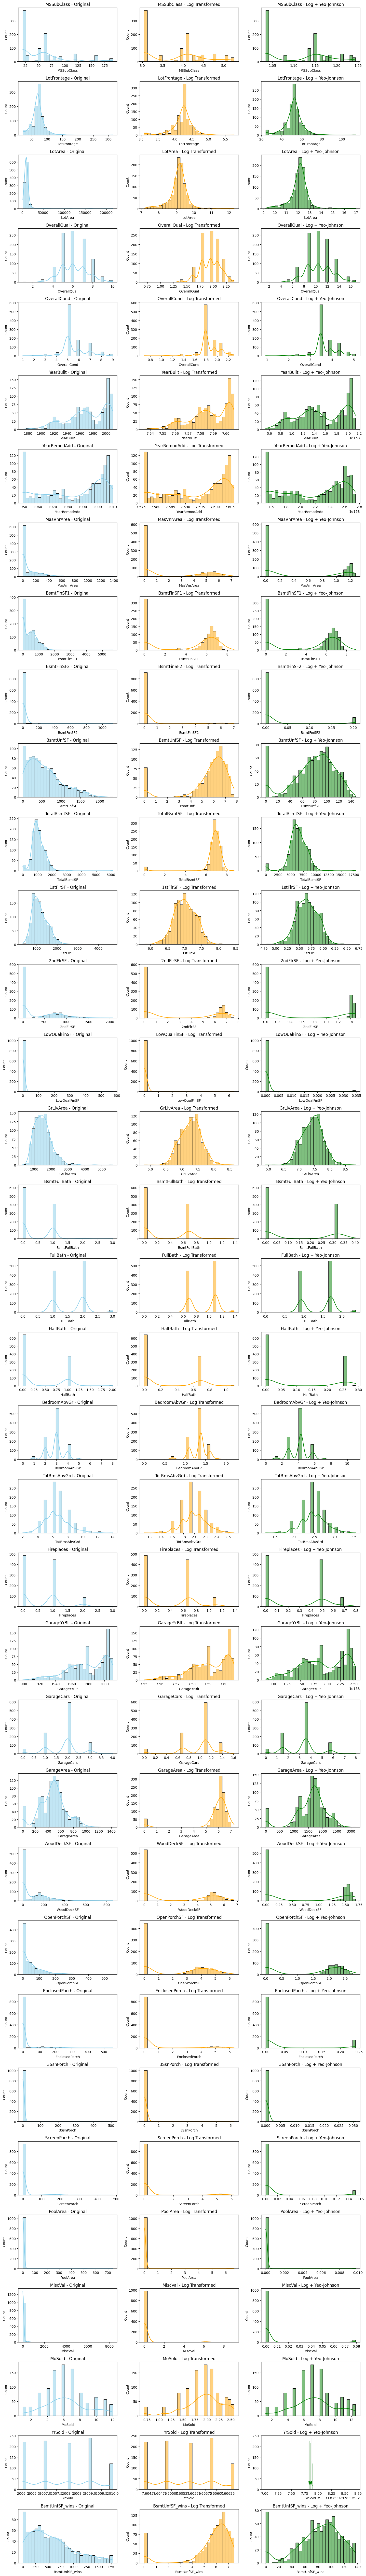

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load CSV
fucked = pd.read_csv("fucked_features.csv")

from scipy.stats.mstats import winsorize

fucked['BsmtUnfSF_wins'] = winsorize(fucked['BsmtUnfSF'], limits=[0.01, 0.01])


# --- Step 1: Apply log transform safely ---
fucked_log = fucked.copy()
for col in fucked_log.columns:
    min_val = fucked_log[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1e-6  # shift to make positive
        fucked_log[col] = np.log1p(fucked_log[col] + shift)
    else:
        fucked_log[col] = np.log1p(fucked_log[col])

# --- Step 2: Apply Yeo-Johnson on log-transformed data ---
pt = PowerTransformer(method='yeo-johnson', standardize=False)
fucked_yeo = pt.fit_transform(fucked_log)
fucked_yeo = pd.DataFrame(fucked_yeo, columns=fucked_log.columns, index=fucked_log.index)

# --- Step 3: Visualize side-by-side distributions ---
num_cols = fucked.columns
plt.figure(figsize=(15, len(num_cols)*3))  # wider figure for 3 plots per row

for i, col in enumerate(num_cols):
    # Original data
    plt.subplot(len(num_cols), 3, 3*i + 1)
    sns.histplot(fucked[col], bins=30, kde=True, color='skyblue')
    plt.title(f"{col} - Original")
    
    # Log-transformed data
    plt.subplot(len(num_cols), 3, 3*i + 2)
    sns.histplot(fucked_log[col], bins=30, kde=True, color='orange')
    plt.title(f"{col} - Log Transformed")
    
    # Log + Yeo-Johnson transformed data
    plt.subplot(len(num_cols), 3, 3*i + 3)
    sns.histplot(fucked_yeo[col], bins=30, kde=True, color='green')
    plt.title(f"{col} - Log + Yeo-Johnson")

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# Load CSV
fucked = pd.read_csv("fucked_features.csv")

from scipy.stats.mstats import winsorize

fucked['BsmtUnfSF_wins'] = winsorize(fucked['BsmtUnfSF'], limits=[0.01, 0.01])


log_transform_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'TotalBsmtSF','1stFlrSF', 'GrLivArea']
yeo_johnson_transform = ['LotArea', 'TotalBsmtSF','OverallQual']

# --- Step 1: Apply log transform safely ---
fucked_log = fucked.copy()
for col in log_transform_cols:
    min_val = fucked_log[col].min()
    if min_val <= 0:
        shift = abs(min_val) + 1e-6  # shift to make positive
        fucked_log[col] = np.log1p(fucked_log[col] + shift)
    else:
        fucked_log[col] = np.log1p(fucked_log[col])

# --- Step 2: Apply Yeo-Johnson on log-transformed data ---
pt = PowerTransformer(method='yeo-johnson', standardize=False)
# transform only selected columns
yeo_values = pt.fit_transform(fucked_log[yeo_johnson_transform])

# create a copy and replace only the transformed columns
fucked_yeo = fucked_log.copy()
fucked_yeo[yeo_johnson_transform] = yeo_values

fucked_yeo = pd.DataFrame(fucked_yeo, columns=fucked_log.columns, index=fucked_log.index)


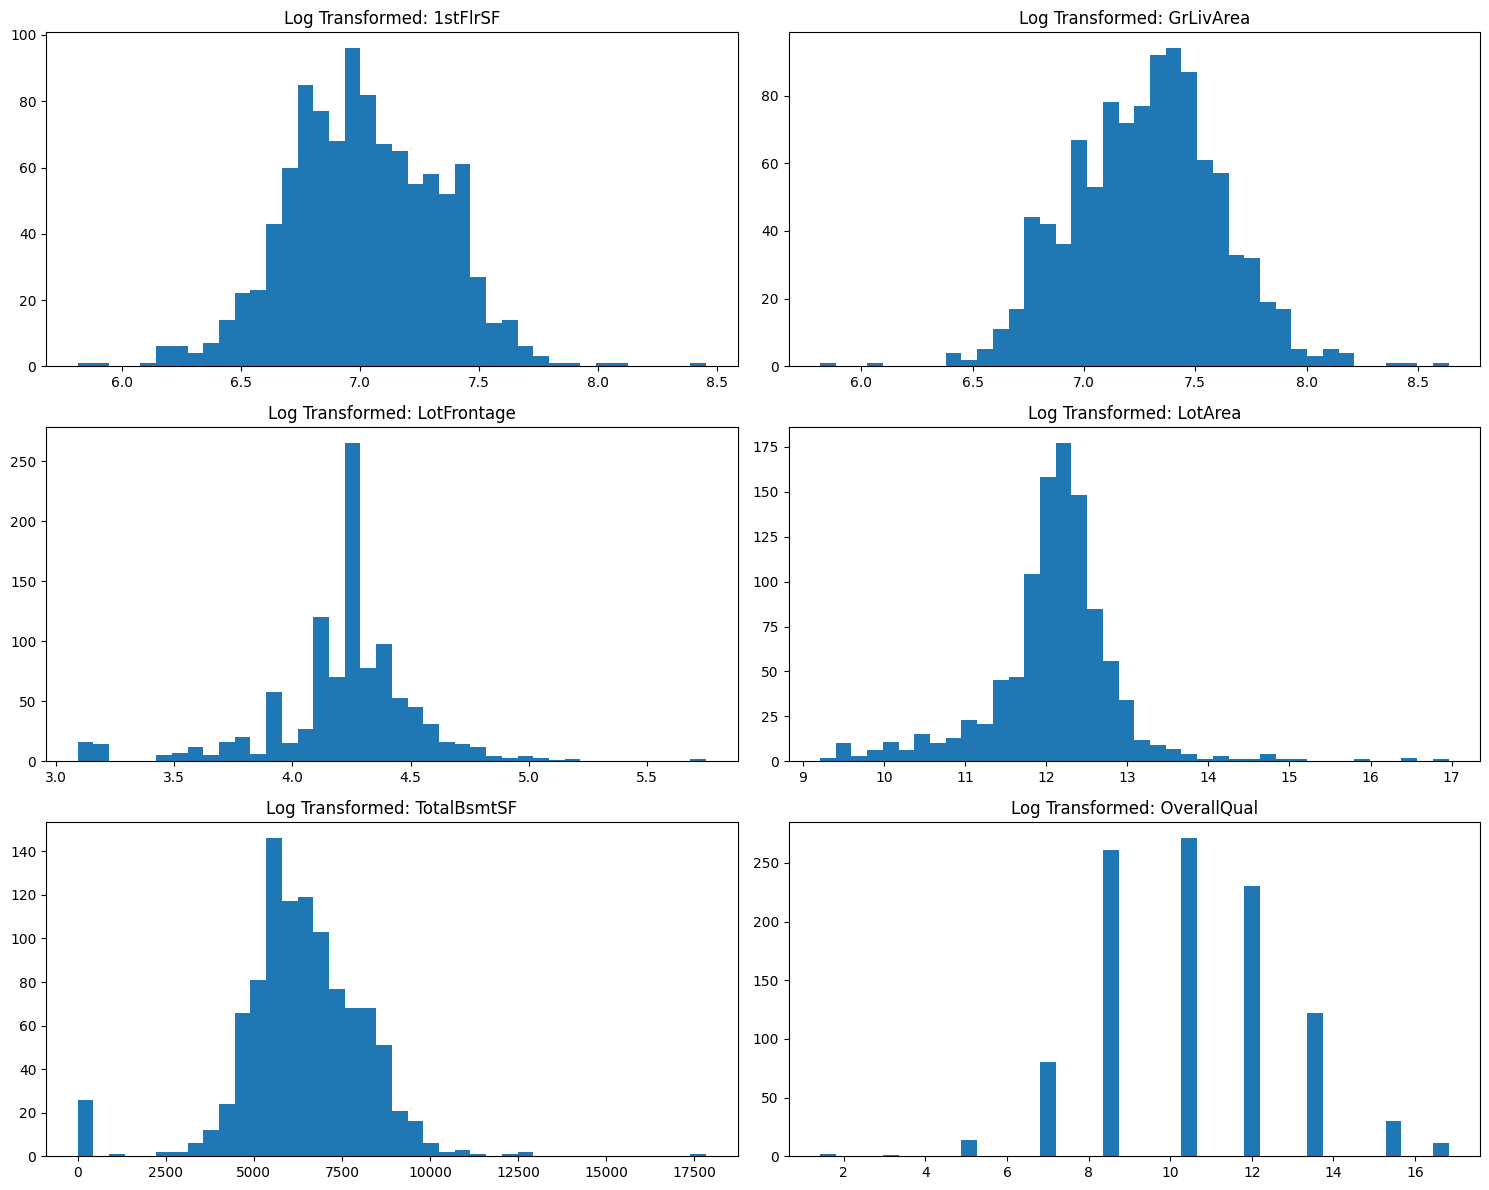

In [40]:
import matplotlib.pyplot as plt

show_cols = ['1stFlrSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF','OverallQual']

plt.figure(figsize=(15, 12))

for i, col in enumerate(show_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(fucked_yeo[col], bins=40)
    plt.title(f"Log Transformed: {col}")
    plt.tight_layout()


## Too Many Zeros

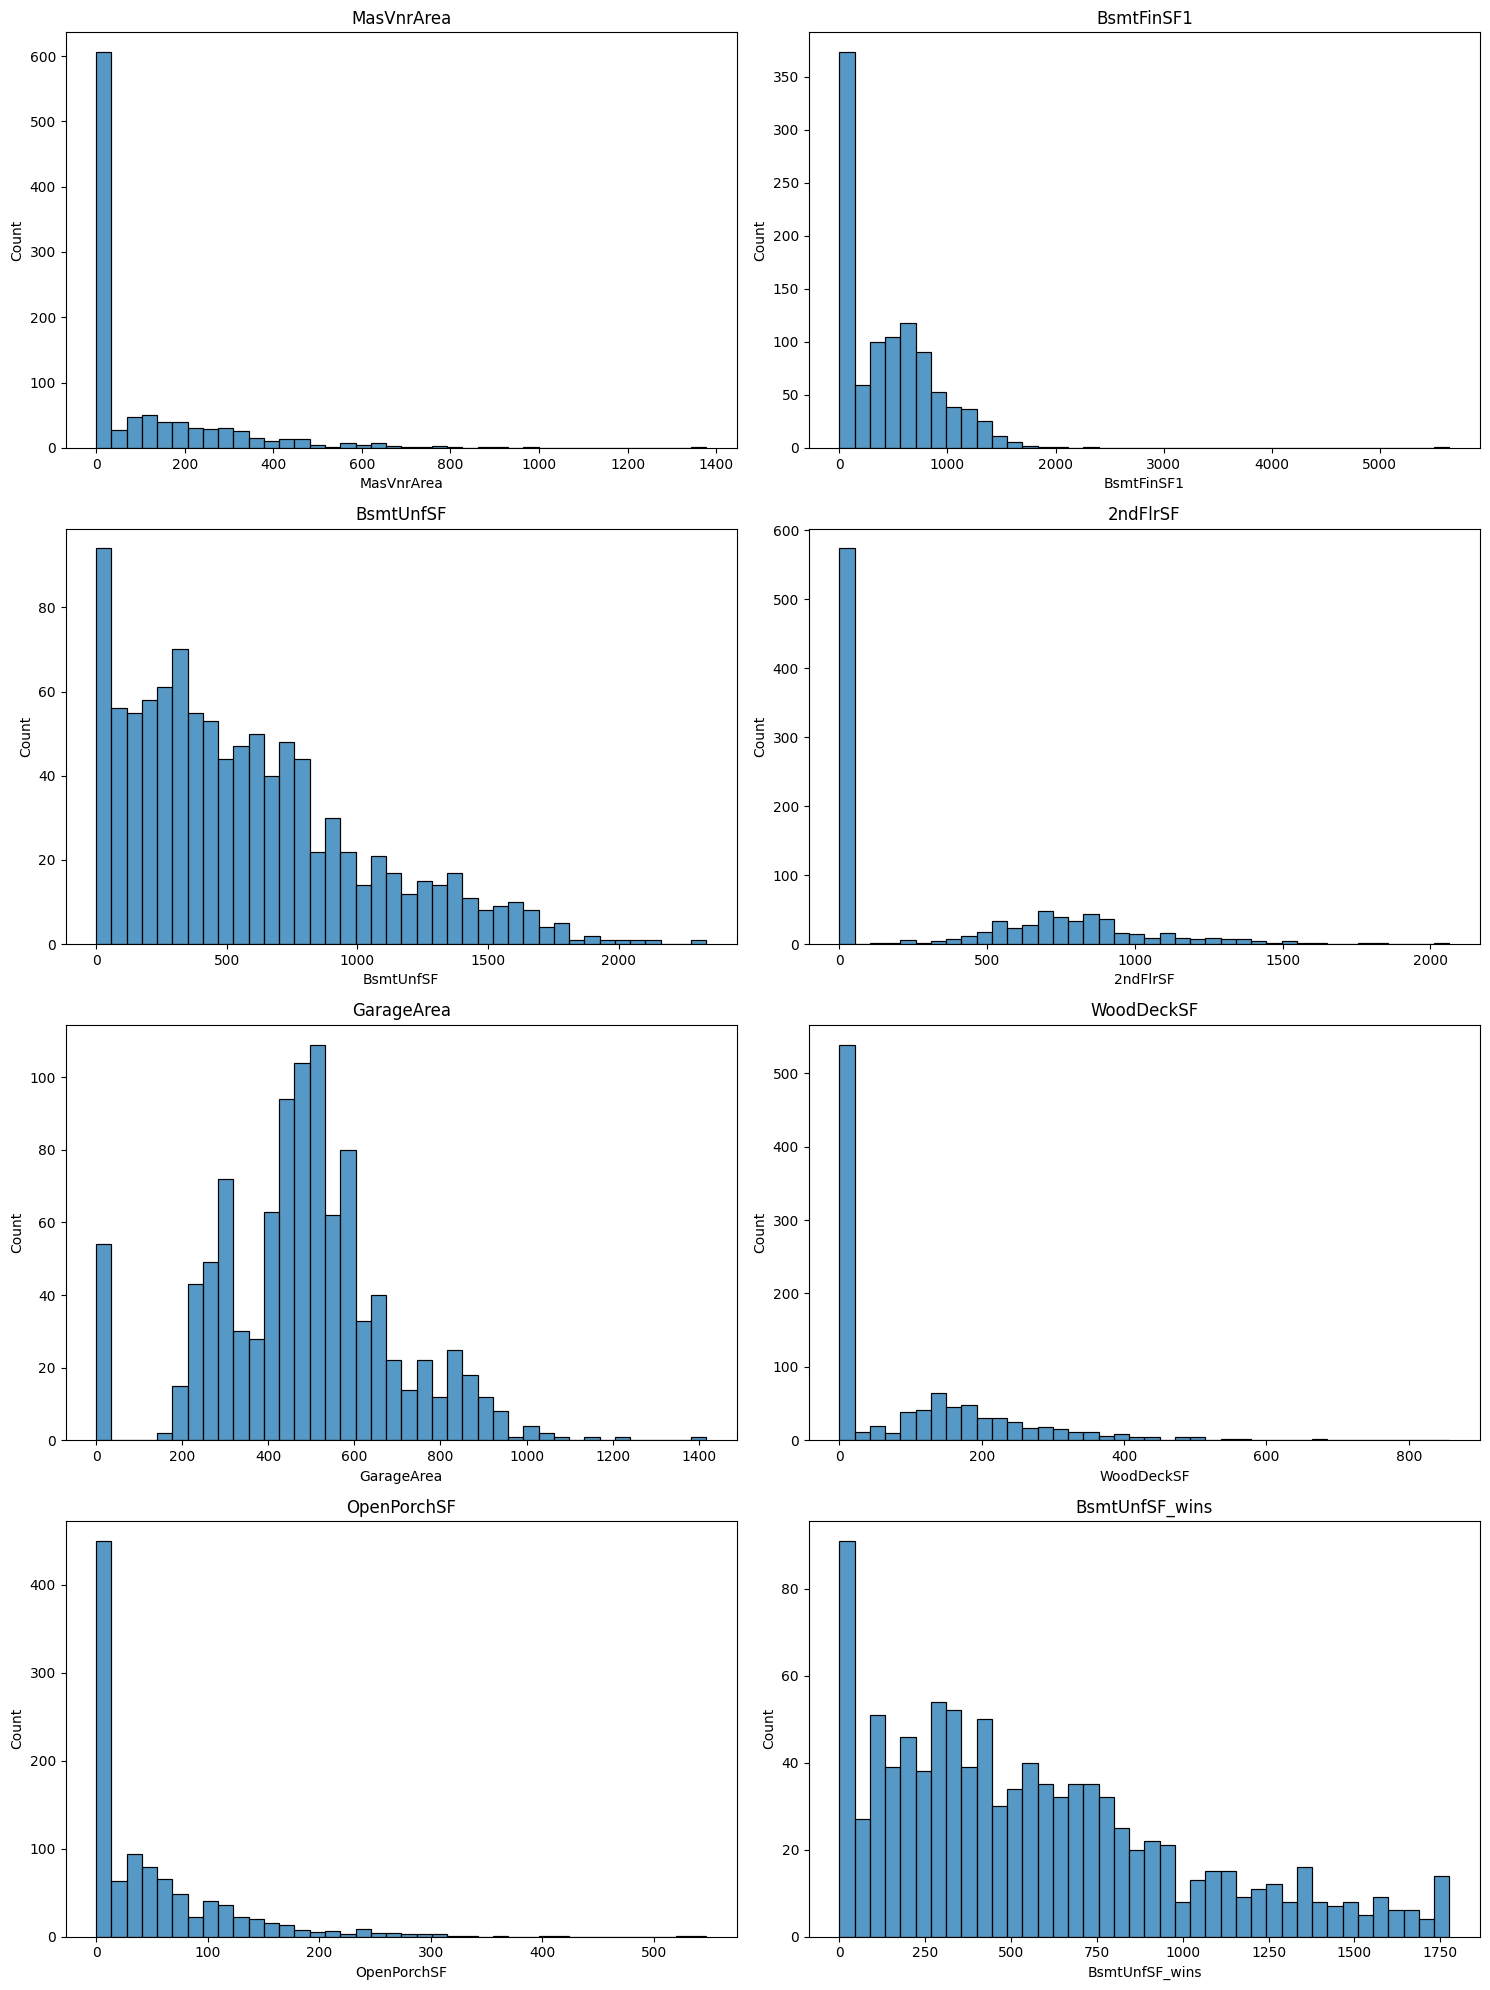

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = [
    'MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF',
    'GarageArea','WoodDeckSF','OpenPorchSF','BsmtUnfSF_wins'
]

fucked_w_zeros = fucked[cols].copy()

plt.figure(figsize=(15, 20))

for i, col in enumerate(cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(fucked_w_zeros[col], bins=40)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [42]:
for col in cols:
    # Binary indicator: does the feature exist?
    fucked_w_zeros[col + '_has'] = (fucked_w_zeros[col] > 0).astype(int)
    
    # Log-transform only non-zero values, 0 otherwise
    fucked_w_zeros[col + '_log'] = np.where(fucked_w_zeros[col] > 0, np.log(fucked_w_zeros[col]), 0)

# Drop original skewed features
fucked_w_zeros = fucked_w_zeros.drop(columns=cols)

# Optional: view first few rows
fucked_w_zeros.head()

/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ismail/miniconda/envs/ml-dl/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/ismail/minicon

MasVnrArea_has  MasVnrArea_log  BsmtFinSF1_has  BsmtFinSF1_log  \
0               1        5.662960               0        0.000000   
1               1        4.382027               1        6.304449   
2               0        0.000000               1        3.178054   
3               1        5.710427               0        0.000000   
4               0        0.000000               1        5.953243   

   BsmtUnfSF_has  BsmtUnfSF_log  2ndFlrSF_has  2ndFlrSF_log  GarageArea_has  \
0              1       7.173192             0      0.000000               1   
1              0       0.000000             0      0.000000               1   
2              1       6.595781             1      6.663133               1   
3              1       7.552237             0      0.000000               1   
4              1       4.248495             1      6.726233               1   

   GarageArea_log  WoodDeckSF_has  WoodDeckSF_log  OpenPorchSF_has  \
0        6.272877               1        4.584967                0   
1        6.263398               0        0.000000                1   
2        6.419995               1        5.129899                1   
3        6.669498               0        0.000000                1   
4        6.309918               1        5.062595                1   

   OpenPorchSF_log  BsmtUnfSF_wins_has  BsmtUnfSF_wins_log  
0         0.000000                   1            7.173192  
1         3.332205                   0            0.000000  
2         3.806662                   1            6.595781  
3         5.252273                   1            7.482682  
4         4.110874                   1            4.248495

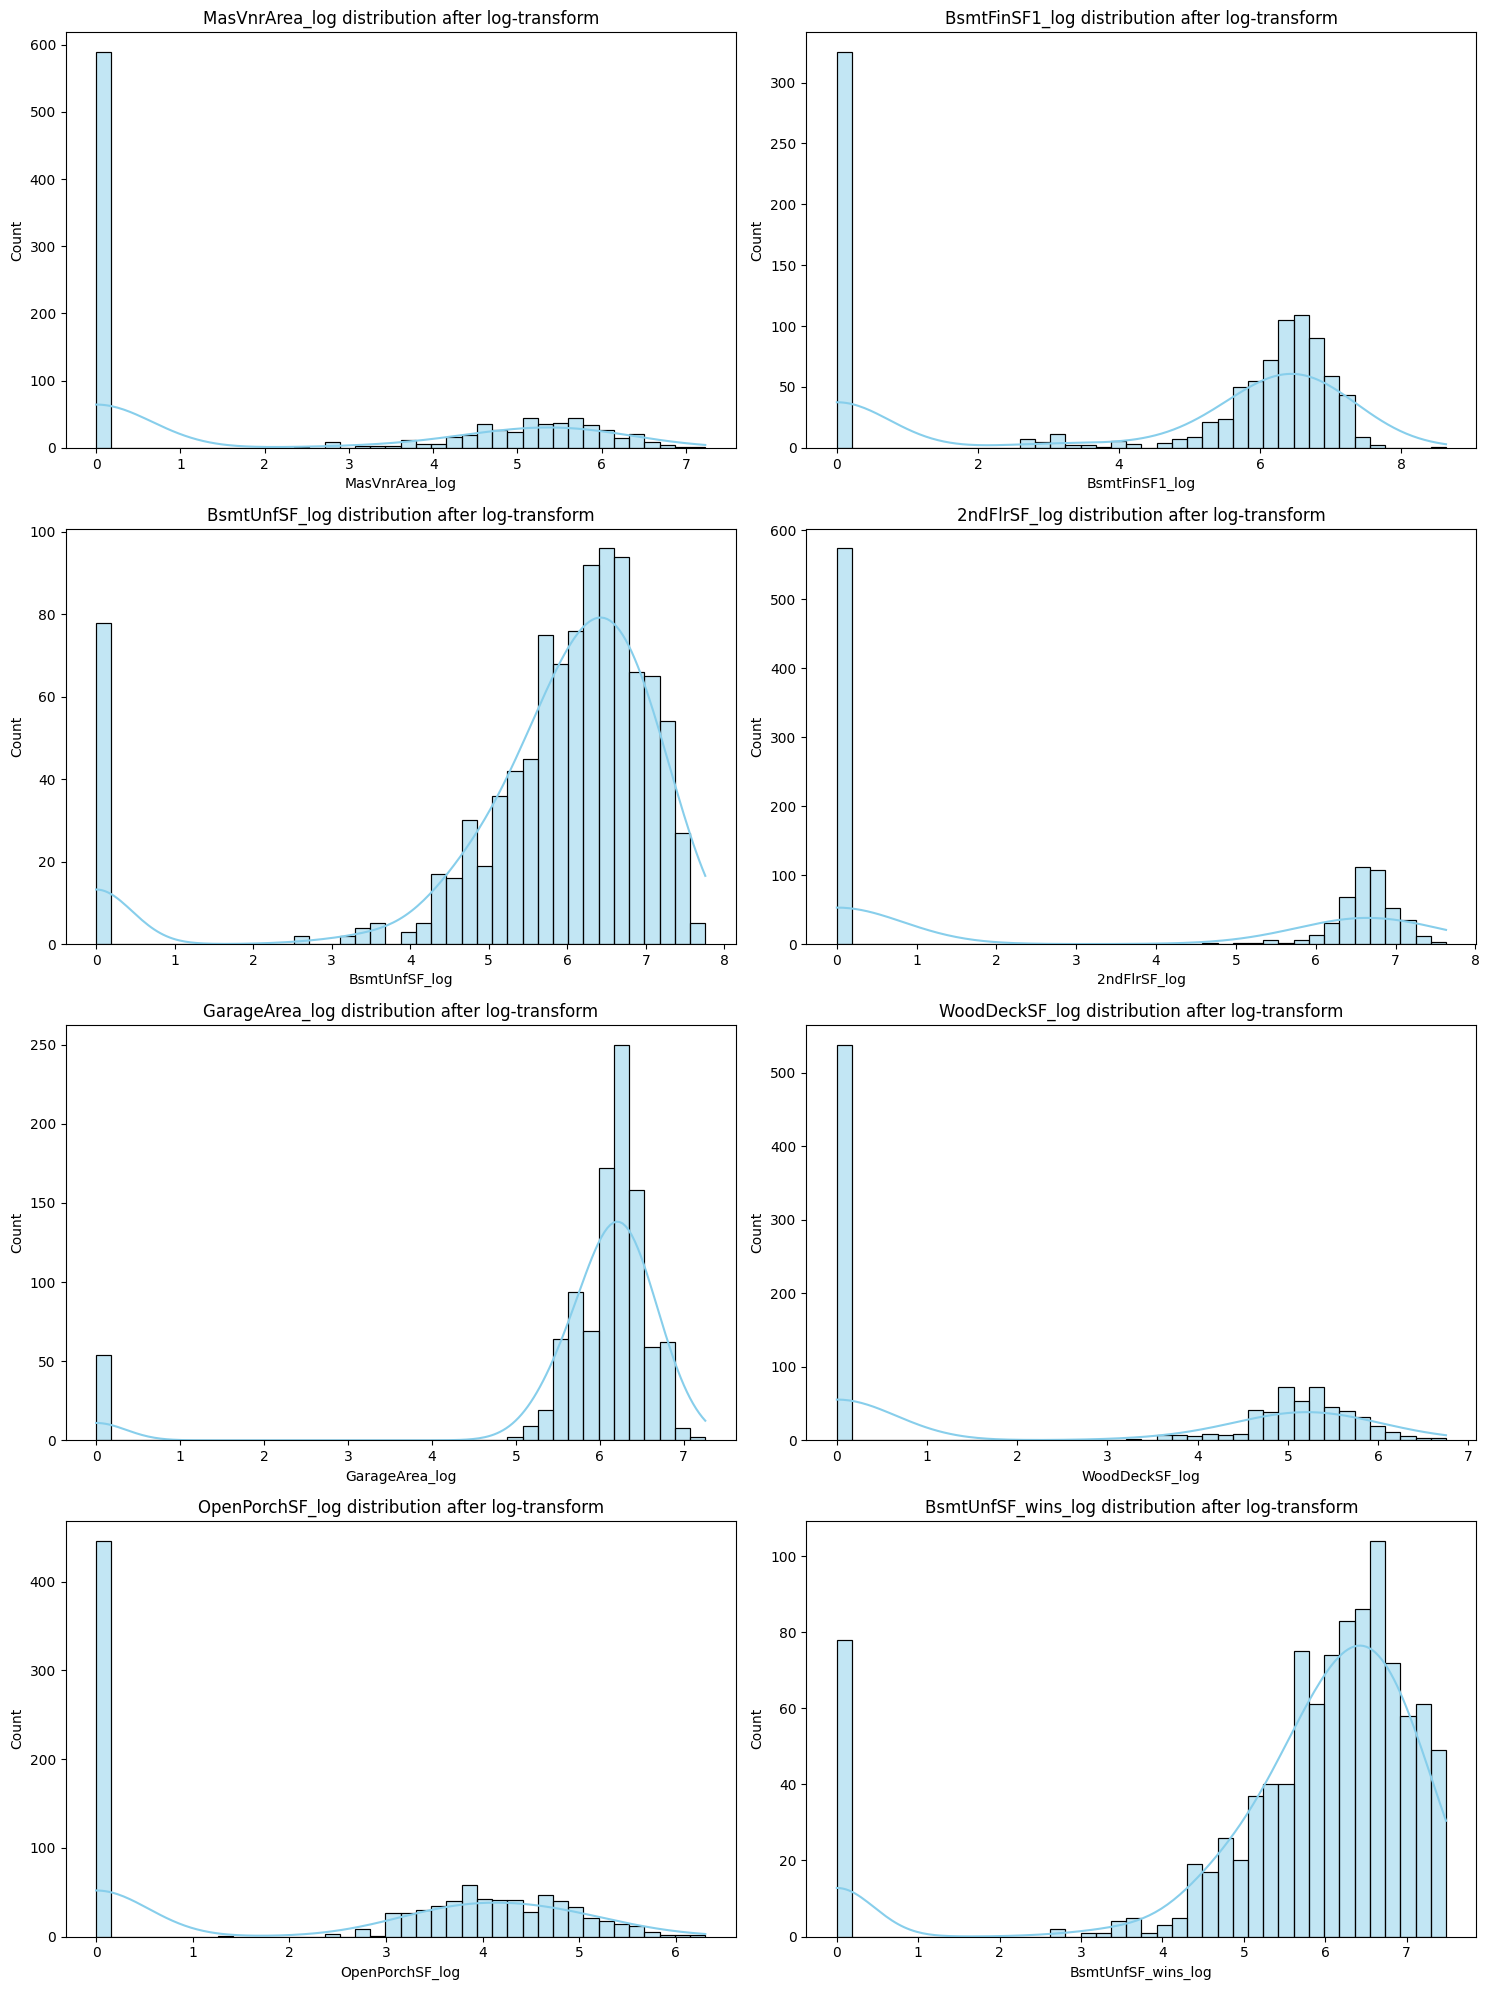

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of your new log-transformed features
log_cols = [
    'MasVnrArea_log','BsmtFinSF1_log','BsmtUnfSF_log','2ndFlrSF_log',
    'GarageArea_log','WoodDeckSF_log','OpenPorchSF_log','BsmtUnfSF_wins_log'
]

plt.figure(figsize=(15, 20))

for i, col in enumerate(log_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(fucked_w_zeros[col], bins=40, kde=True, color='skyblue')
    plt.title(f'{col} distribution after log-transform')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [44]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
# transform only selected columns
yeo_values = pt.fit_transform(fucked_w_zeros[log_cols])

# create a copy and replace only the transformed columns
fucked_w_zeros_yeo = fucked_w_zeros.copy()
fucked_w_zeros_yeo[log_cols] = yeo_values

fucked_w_zeros_yeo = pd.DataFrame(fucked_w_zeros_yeo, columns=fucked_w_zeros.columns, index=fucked_w_zeros.index)

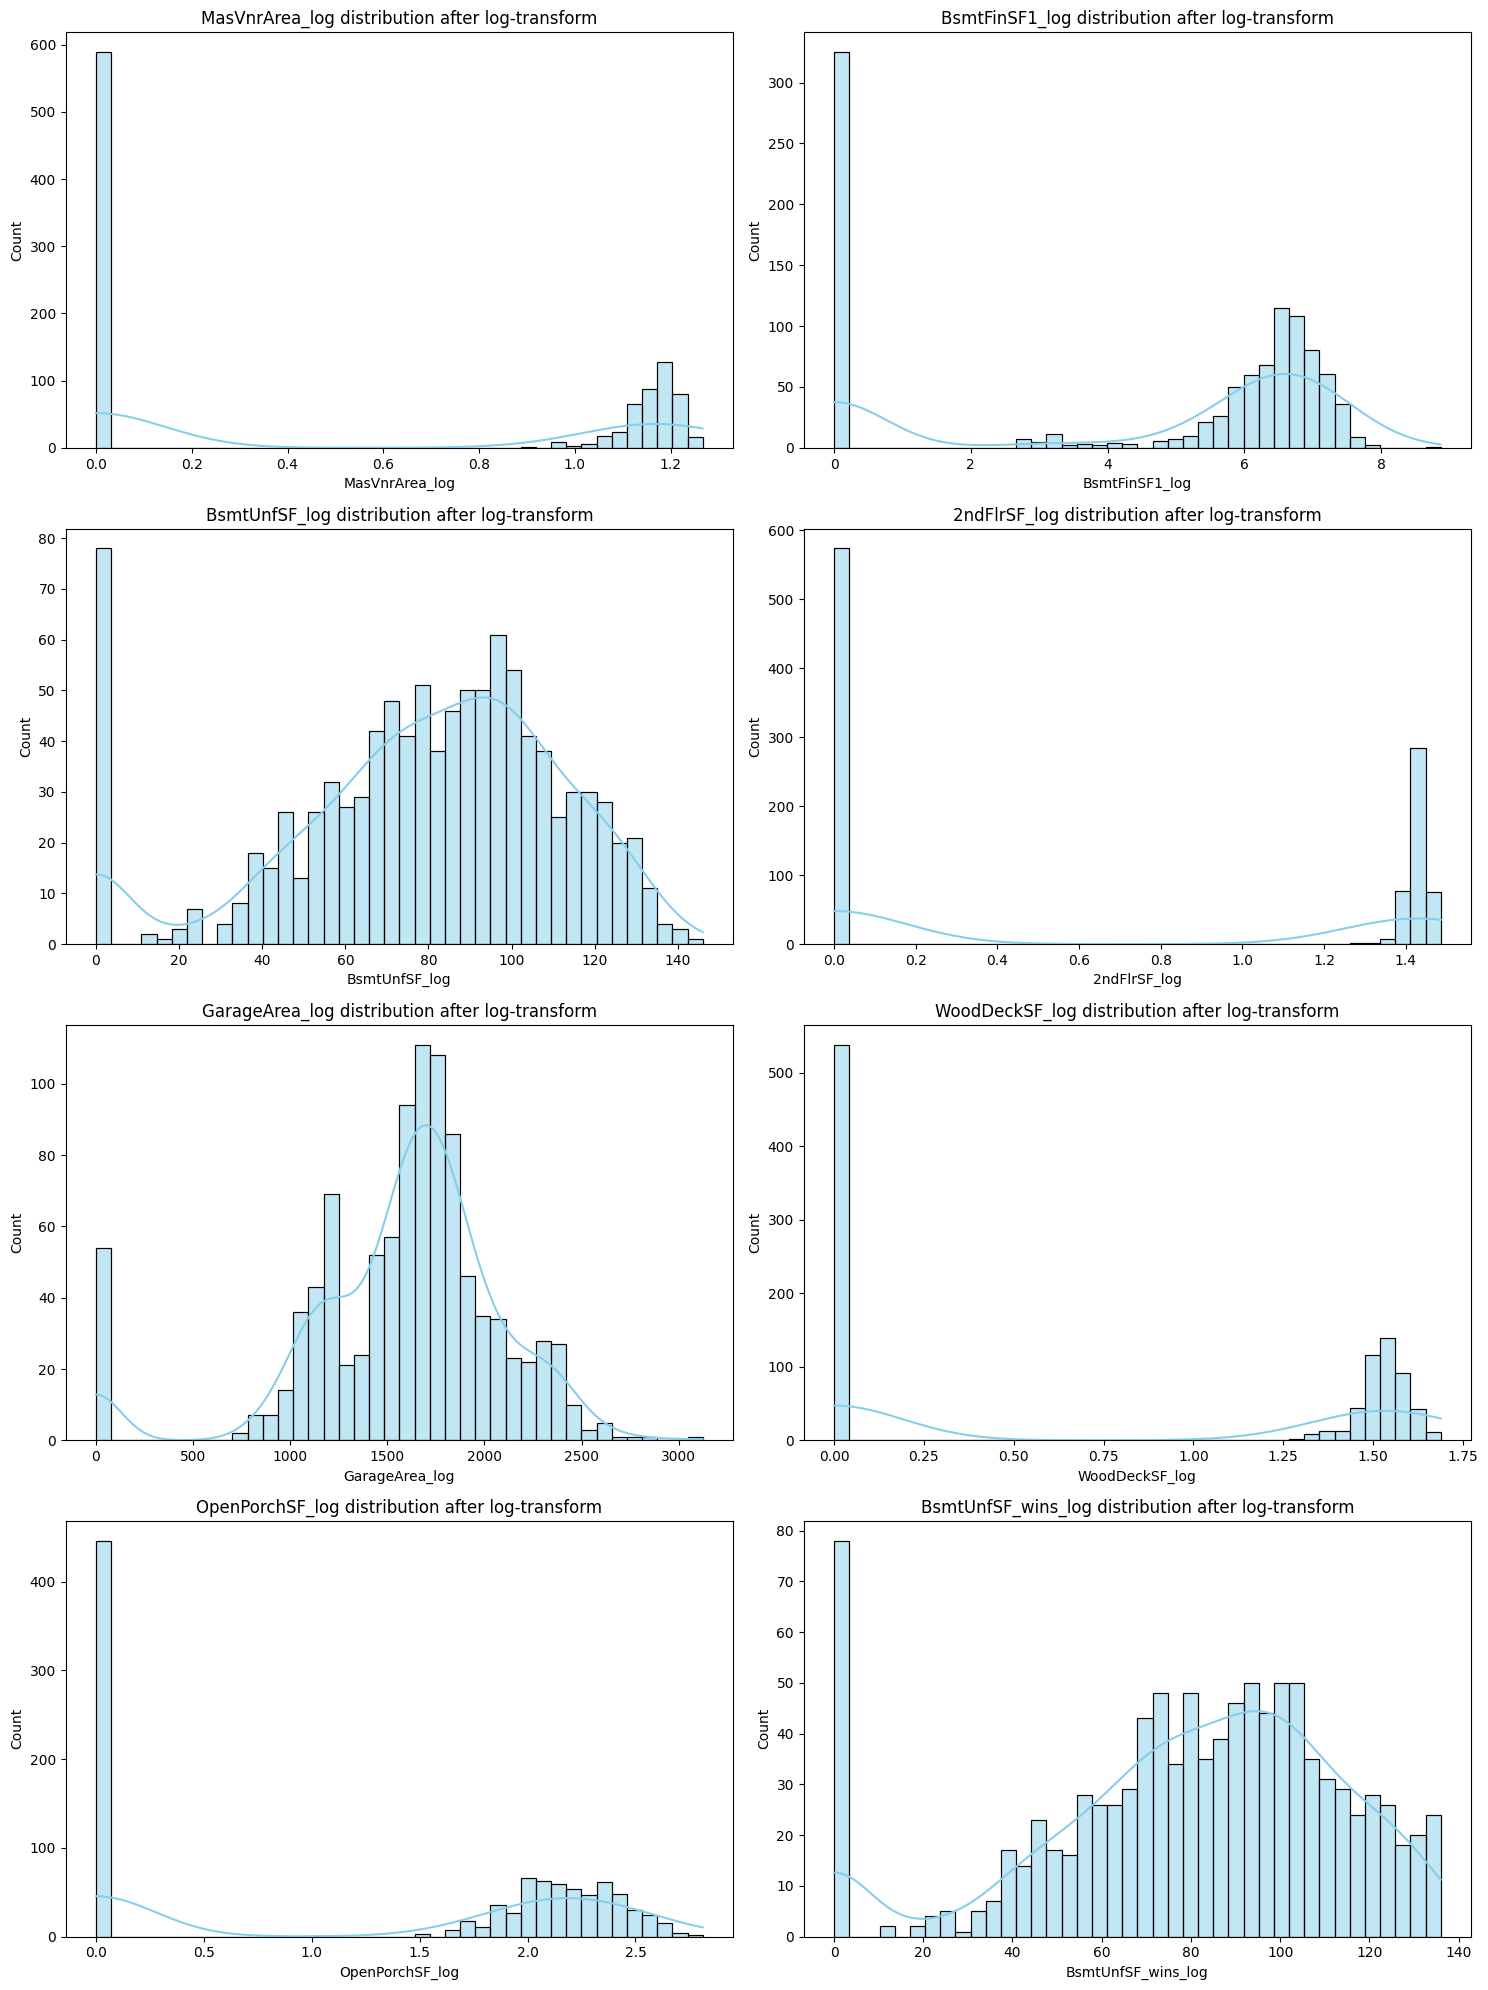

In [45]:


plt.figure(figsize=(15, 20))

for i, col in enumerate(log_cols, 1):
    plt.subplot(4, 2, i)
    sns.histplot(fucked_w_zeros_yeo[col], bins=40, kde=True, color='skyblue')
    plt.title(f'{col} distribution after log-transform')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [51]:
fucked_w_zeros_yeo.columns

Index(['MasVnrArea_has', 'MasVnrArea_log', 'BsmtFinSF1_has', 'BsmtFinSF1_log',
       'BsmtUnfSF_has', 'BsmtUnfSF_log', '2ndFlrSF_has', '2ndFlrSF_log',
       'GarageArea_has', 'GarageArea_log', 'WoodDeckSF_has', 'WoodDeckSF_log',
       'OpenPorchSF_has', 'OpenPorchSF_log', 'BsmtUnfSF_wins_has',
       'BsmtUnfSF_wins_log'],
      dtype='object')

In [52]:
fucked_yeo[['1stFlrSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF','OverallQual']].columns

Index(['1stFlrSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF',
       'OverallQual'],
      dtype='object')

In [59]:


cols_deleted = [
    'MasVnrArea','BsmtFinSF1','BsmtUnfSF','2ndFlrSF',
    'GarageArea','WoodDeckSF','OpenPorchSF','BsmtUnfSF_wins',
    '1stFlrSF', 'GrLivArea', 'LotFrontage', 'LotArea', 'TotalBsmtSF','OverallQual'
]


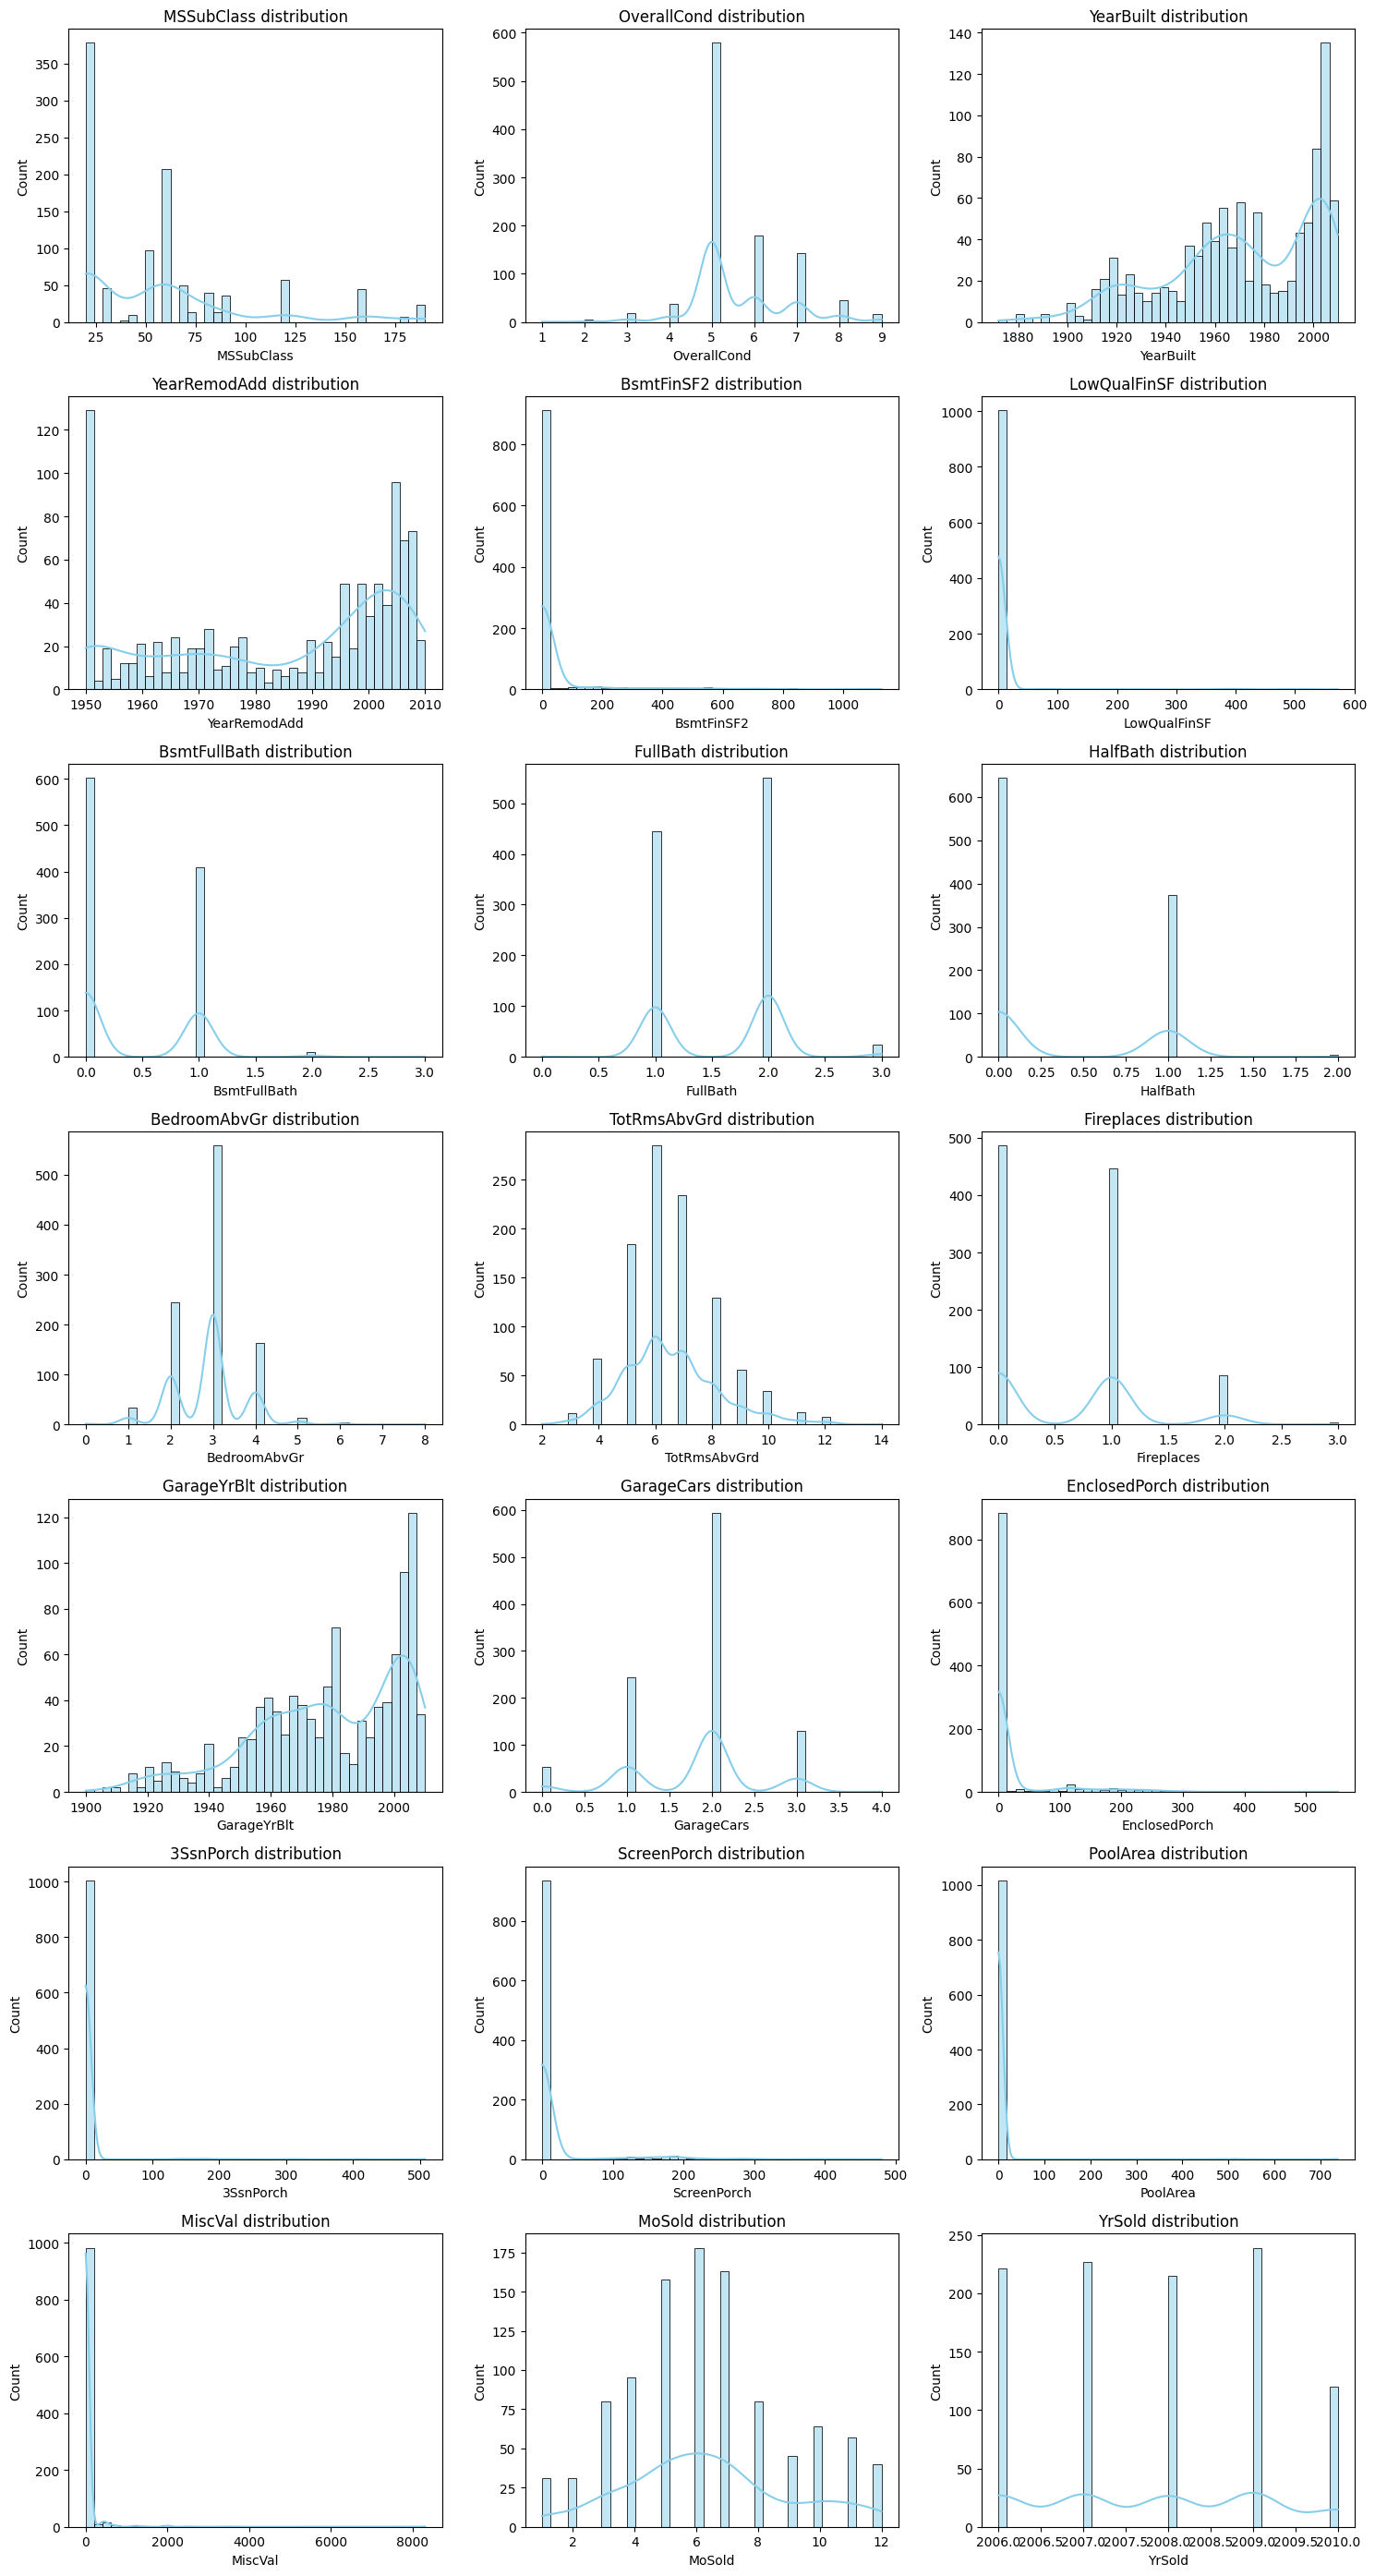

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Columns in 'fucked' that are NOT in all_cols
cols_to_plot = [col for col in fucked.columns if col not in cols_deleted]

# Determine number of rows needed (3 plots per row)
cols_per_row = 3
rows = math.ceil(len(cols_to_plot) / cols_per_row)

plt.figure(figsize=(cols_per_row * 5, rows * 4))  # width x height

for i, col in enumerate(cols_to_plot, 1):
    plt.subplot(rows, cols_per_row, i)
    sns.histplot(fucked[col], bins=40, kde=True, color='skyblue')
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'